In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import numpy as np 
import math
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score, auc, roc_curve, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge, ElasticNet, LogisticRegressionCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

sns.set()
import warnings
warnings.filterwarnings("ignore")

# `Data understanding`

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/03-Abfa/Fraud Water-4 class.xlsx')
df.head()

,file_num,issue_date,year_of_issue,month_of_issue,day_of_issue,previous_reading_date,current_reading_date,previous_reading_number,current_reading_number,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,fraud,cluster_4k
0,201076231,1390/02/14,1390,2,14,1389/12/18,1390/02/07,7359,7484,0.75,5,125,49,322419,15.306122,1,0,0
1,201076231,1390/03/28,1390,3,28,1390/02/07,1390/03/23,7484,7581,0.75,5,97,47,232750,12.382979,1,0,0
2,201076231,1390/05/05,1390,5,5,1390/03/23,1390/04/29,7581,7671,0.75,5,90,37,229050,14.594595,1,0,0
3,201076231,1390/06/20,1390,6,20,1390/04/29,1390/06/14,7671,7764,0.75,5,93,47,219314,11.872340,1,0,0
4,201076231,1390/07/30,1390,7,30,1390/06/14,1390/07/24,7764,7847,0.75,5,83,41,197606,12.146341,1,0,0


In [ ]:
df.shape

(242938, 18)

In [ ]:
df.columns

Index(['file_num', 'issue_date', 'year_of_issue', 'month_of_issue',
       'day_of_issue', 'previous_reading_date', 'current_reading_date',
       'previous_reading_number', 'current_reading_number', 'diameter',
       'num_of_units', 'consumption', 'consumption_period',
       'course_bill_amount', 'avg_bill_consumption ', 'correct_meter ',
       'fraud', 'cluster_4k'],
      dtype='object')

In [ ]:
df.drop([ 'fraud'], axis=1, inplace=True)
df.head()

,file_num,issue_date,year_of_issue,month_of_issue,day_of_issue,previous_reading_date,current_reading_date,previous_reading_number,current_reading_number,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
0,201076231,1390/02/14,1390,2,14,1389/12/18,1390/02/07,7359,7484,0.75,5,125,49,322419,15.306122,1,0
1,201076231,1390/03/28,1390,3,28,1390/02/07,1390/03/23,7484,7581,0.75,5,97,47,232750,12.382979,1,0
2,201076231,1390/05/05,1390,5,5,1390/03/23,1390/04/29,7581,7671,0.75,5,90,37,229050,14.594595,1,0
3,201076231,1390/06/20,1390,6,20,1390/04/29,1390/06/14,7671,7764,0.75,5,93,47,219314,11.872340,1,0
4,201076231,1390/07/30,1390,7,30,1390/06/14,1390/07/24,7764,7847,0.75,5,83,41,197606,12.146341,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242938 entries, 0 to 242937
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   file_num                 242938 non-null  int64  
 1   issue_date               242938 non-null  object 
 2   year_of_issue            242938 non-null  int64  
 3   month_of_issue           242938 non-null  int64  
 4   day_of_issue             242938 non-null  int64  
 5   previous_reading_date    242938 non-null  object 
 6   current_reading_date     242938 non-null  object 
 7   previous_reading_number  242938 non-null  int64  
 8   current_reading_number   242938 non-null  int64  
 9   diameter                 242938 non-null  float64
 10  num_of_units             242938 non-null  int64  
 11  consumption              242938 non-null  int64  
 12  consumption_period       242938 non-null  int64  
 13  course_bill_amount       242938 non-null  int64  
 14  avg_

In [ ]:
df.shape

(242938, 17)

0    65303
1    63895
2    57851
3    55889
Name: cluster_4k, dtype: int64

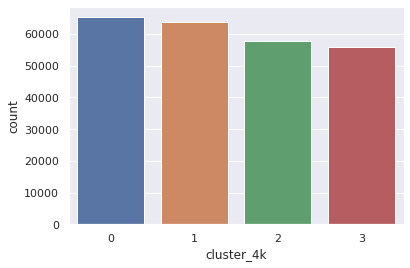

In [ ]:
sns.countplot(x = "cluster_4k", data = df)
df.loc[:, 'cluster_4k'].value_counts()

In [ ]:
df.drop(['file_num', 'issue_date','previous_reading_date', 'current_reading_date',
       'previous_reading_number', 'current_reading_number'], axis=1, inplace=True)
df.head()

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
0,1390,2,14,0.75,5,125,49,322419,15.306122,1,0
1,1390,3,28,0.75,5,97,47,232750,12.382979,1,0
2,1390,5,5,0.75,5,90,37,229050,14.594595,1,0
3,1390,6,20,0.75,5,93,47,219314,11.872340,1,0
4,1390,7,30,0.75,5,83,41,197606,12.146341,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242938 entries, 0 to 242937
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year_of_issue          242938 non-null  int64  
 1   month_of_issue         242938 non-null  int64  
 2   day_of_issue           242938 non-null  int64  
 3   diameter               242938 non-null  float64
 4   num_of_units           242938 non-null  int64  
 5   consumption            242938 non-null  int64  
 6   consumption_period     242938 non-null  int64  
 7   course_bill_amount     242938 non-null  int64  
 8   avg_bill_consumption   242938 non-null  float64
 9   correct_meter          242938 non-null  int64  
 10  cluster_4k             242938 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 20.4 MB


In [ ]:
df.isnull().sum()

year_of_issue            0
month_of_issue           0
day_of_issue             0
diameter                 0
num_of_units             0
consumption              0
consumption_period       0
course_bill_amount       0
avg_bill_consumption     0
correct_meter            0
cluster_4k               0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_issue,242938.0,1393.732314,2.291895e+00,1390.0,1392.000000,1394.00,1396.000000,1397.0
month_of_issue,242938.0,6.631033,3.278418e+00,1.0,4.000000,7.00,9.000000,12.0
day_of_issue,242938.0,15.994459,9.114094e+00,1.0,8.000000,16.00,24.000000,31.0
diameter,242938.0,0.741423,1.539023e-01,0.5,0.750000,0.75,0.750000,3.0
num_of_units,242938.0,4.697639,8.378606e+00,1.0,2.000000,4.00,5.000000,396.0
consumption,242938.0,100.243980,2.155100e+02,0.0,37.000000,70.00,123.000000,41961.0
consumption_period,242938.0,41.239036,1.315257e+01,1.0,35.000000,38.00,44.000000,199.0
course_bill_amount,242938.0,519556.159930,2.371807e+06,0.0,143476.000000,292096.00,572467.000000,733372912.0
avg_bill_consumption,242938.0,16.852604,4.038368e+01,0.0,11.395349,15.00,19.772727,10959.0
correct_meter,242938.0,0.976801,1.505364e-01,0.0,1.000000,1.00,1.000000,1.0


In [ ]:
df.describe()

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
count,242938.000000,242938.000000,242938.000000,242938.000000,242938.000000,242938.000000,242938.000000,2.429380e+05,242938.000000,242938.000000,242938.000000
mean,1393.732314,6.631033,15.994459,0.741423,4.697639,100.243980,41.239036,5.195562e+05,16.852604,0.976801,1.429435
std,2.291895,3.278418,9.114094,0.153902,8.378606,215.509956,13.152573,2.371807e+06,40.383679,0.150536,1.114785
min,1390.000000,1.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1392.000000,4.000000,8.000000,0.750000,2.000000,37.000000,35.000000,1.434760e+05,11.395349,1.000000,0.000000
50%,1394.000000,7.000000,16.000000,0.750000,4.000000,70.000000,38.000000,2.920960e+05,15.000000,1.000000,1.000000
75%,1396.000000,9.000000,24.000000,0.750000,5.000000,123.000000,44.000000,5.724670e+05,19.772727,1.000000,2.000000
max,1397.000000,12.000000,31.000000,3.000000,396.000000,41961.000000,199.000000,7.333729e+08,10959.000000,1.000000,3.000000


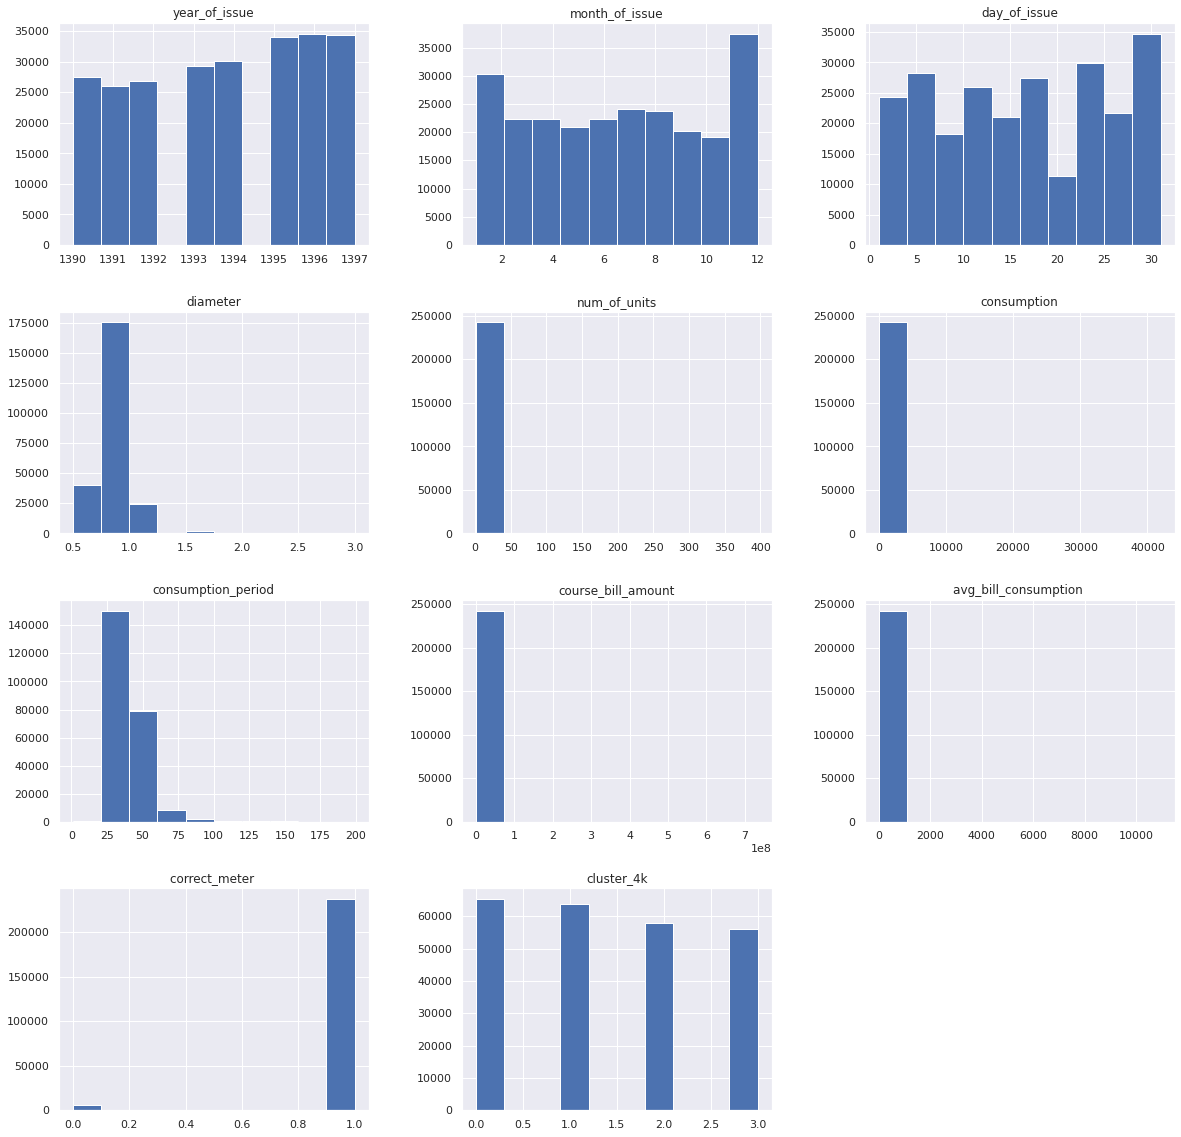

In [ ]:
p = df.hist(figsize = (20,20))

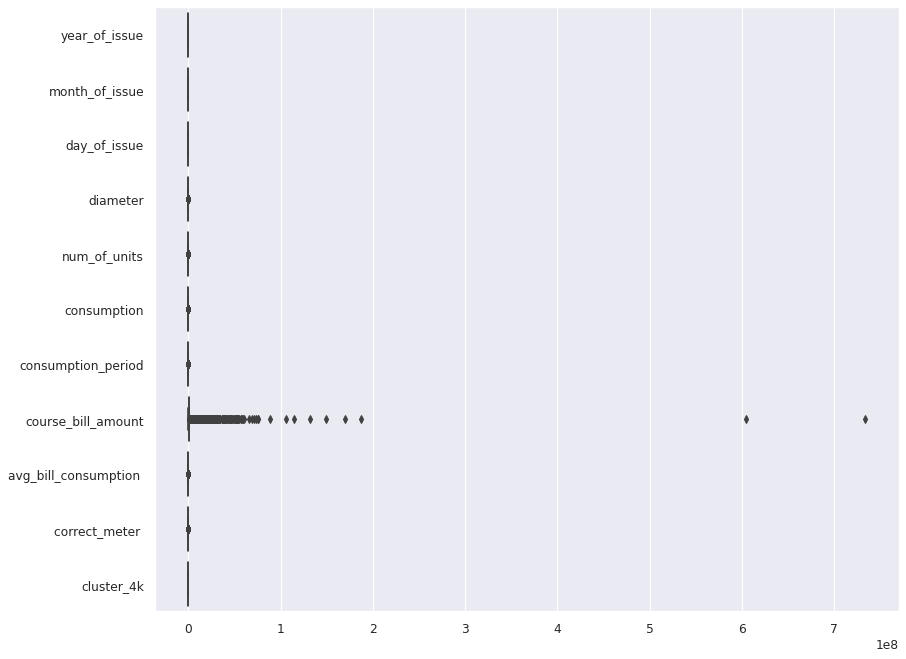

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
ax = sns.boxplot(data=df, orient="h", palette="husl", whis=1.5)

# `Preprocessing`

## `Handle Outlier and Missing Value`

### ----------------------------------------------- `IQR` -----------------------------------------------

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year_of_issue                 4.000000
month_of_issue                5.000000
day_of_issue                 16.000000
diameter                      0.000000
num_of_units                  3.000000
consumption                  86.000000
consumption_period            9.000000
course_bill_amount       428991.000000
avg_bill_consumption          8.377378
correct_meter                 0.000000
cluster_4k                    2.000000
dtype: float64


In [ ]:
def outlier_detect_new(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

In [ ]:
df.columns

Index(['year_of_issue', 'month_of_issue', 'day_of_issue', 'diameter',
       'num_of_units', 'consumption', 'consumption_period',
       'course_bill_amount', 'avg_bill_consumption ', 'correct_meter ',
       'cluster_4k'],
      dtype='object')

In [ ]:
print("***************************  ********************************")
print("diameter:{}".format(outlier_detect_new(df,'diameter').shape[0]))
print("num_of_units:{}".format(outlier_detect_new(df,'num_of_units').shape[0]))
print("consumption: {}".format(outlier_detect_new(df,'consumption').shape[0]))
print("consumption_period: {}".format(outlier_detect_new(df,'consumption_period').shape[0]))
print("course_bill_amount: {}".format(outlier_detect_new(df,'course_bill_amount').shape[0]))
print("avg_bill_consumption : {}".format(outlier_detect_new(df,'avg_bill_consumption ').shape[0]))
print("correct_meter : {}".format(outlier_detect_new(df,'correct_meter ').shape[0]))
print("***************************  ********************************")
print("cluster_4k: {}".format(outlier_detect_new(df,'cluster_4k').shape[0]))


***************************  ********************************
diameter:67273
num_of_units:26648
consumption: 14385
consumption_period: 17214
course_bill_amount: 18304
avg_bill_consumption : 10684
correct_meter : 5636
***************************  ********************************
cluster_4k: 0


(array([5.2549e+04, 6.3411e+04, 4.4921e+04, 2.8429e+04, 1.7319e+04,
        1.1331e+04, 7.5750e+03, 4.9670e+03, 3.1640e+03, 2.3520e+03,
        1.5490e+03, 1.1110e+03, 8.2800e+02, 6.7000e+02, 5.5400e+02,
        4.0600e+02, 2.8500e+02, 2.4100e+02, 2.1900e+02, 1.7700e+02,
        1.4300e+02, 9.6000e+01, 8.8000e+01, 5.8000e+01, 6.8000e+01,
        4.9000e+01, 4.9000e+01, 3.3000e+01, 2.8000e+01, 2.8000e+01]),
 array([   0.        ,   33.33333333,   66.66666667,  100.        ,
         133.33333333,  166.66666667,  200.        ,  233.33333333,
         266.66666667,  300.        ,  333.33333333,  366.66666667,
         400.        ,  433.33333333,  466.66666667,  500.        ,
         533.33333333,  566.66666667,  600.        ,  633.33333333,
         666.66666667,  700.        ,  733.33333333,  766.66666667,
         800.        ,  833.33333333,  866.66666667,  900.        ,
         933.33333333,  966.66666667, 1000.        ]),
 <a list of 30 Patch objects>)

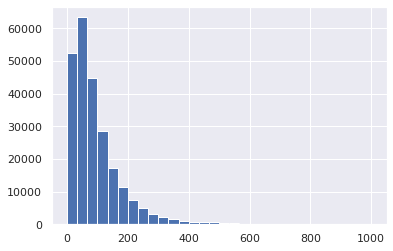

In [ ]:
plt.hist(df["consumption"],30, range=[0, 1000], align='mid')


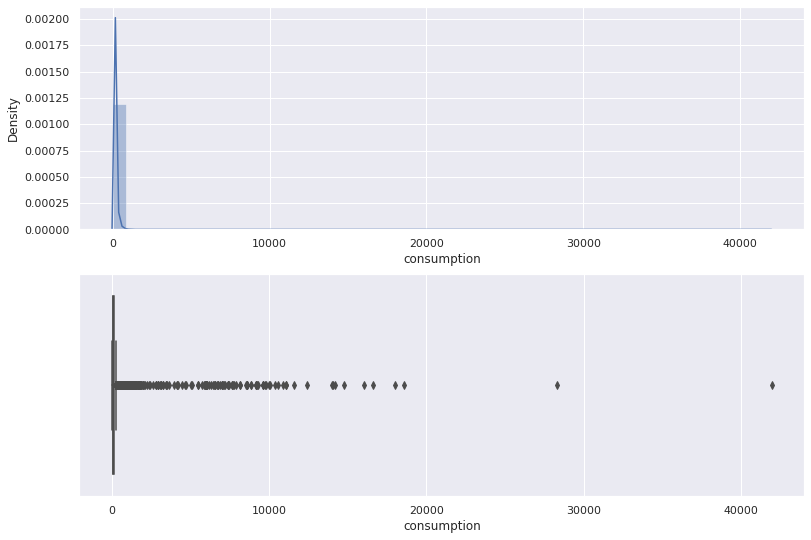

In [ ]:
fig, axs = plt.subplots(nrows= 2, figsize=(13,9))
hist_plot = sns.distplot(df["consumption"], ax = axs[0])
box_plot = sns.boxplot(df["consumption"], ax = axs[1])

(array([2.34463e+05, 7.61400e+03, 6.89000e+02, 8.40000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.80000e+01]),
 array([  0.        ,  13.33333333,  26.66666667,  40.        ,
         53.33333333,  66.66666667,  80.        ,  93.33333333,
        106.66666667, 120.        , 133.33333333, 146.66666667,
        160.        , 173.33333333, 186.66666667, 200.        ,
        213.33333333, 226.66666667, 240.        , 253.33333333,
        266.66666667, 280.        , 293.33333333, 306.66666667,
        320.        , 333.33333333, 346.66666667, 360.        ,
        373.33333333, 386.66666667, 400.        ]),
 <a list of 30 Patch objects>)

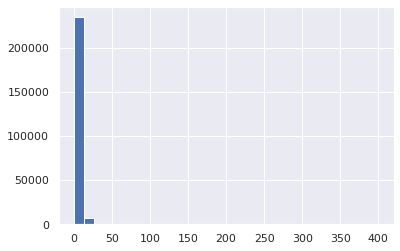

In [ ]:
plt.hist(df["num_of_units"],30, range=[0, 400], align='mid')


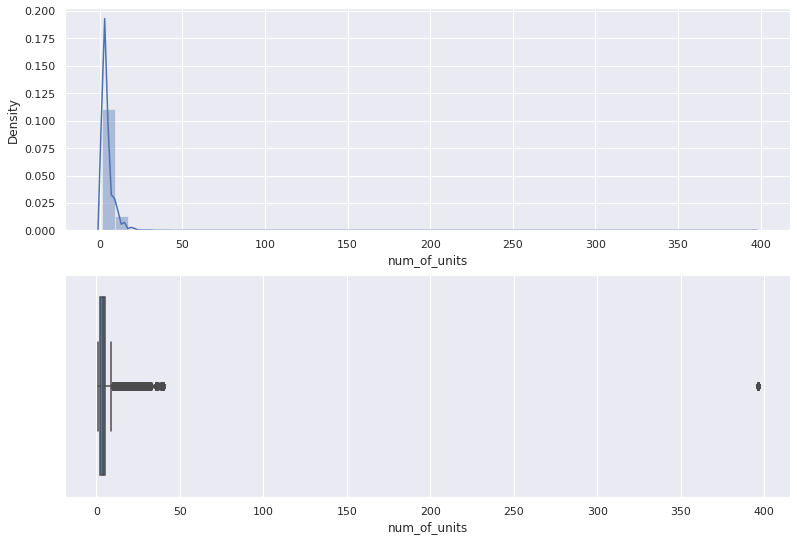

In [ ]:
fig, axs = plt.subplots(nrows= 2, figsize=(13,9))
hist_plot = sns.distplot(df["num_of_units"], ax = axs[0])
box_plot = sns.boxplot(df["num_of_units"], ax = axs[1])

(array([2.9500e+02, 2.4900e+02, 2.2700e+02, 5.5500e+02, 3.9976e+04,
        9.7943e+04, 5.8463e+04, 2.2559e+04, 8.7750e+03, 7.0900e+03,
        1.3830e+03, 1.0720e+03, 1.1140e+03, 8.6000e+02, 2.9200e+02,
        3.9000e+02, 2.2100e+02, 1.6900e+02, 1.7800e+02, 2.6100e+02,
        1.4200e+02, 8.0000e+01, 9.8000e+01, 8.5000e+01, 9.8000e+01,
        8.8000e+01, 6.8000e+01, 4.8000e+01, 1.0800e+02, 5.1000e+01]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <a list of 30 Patch objects>)

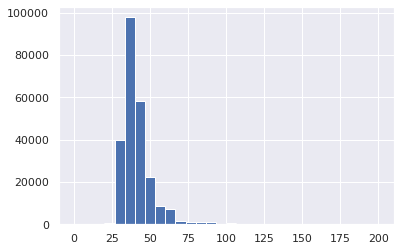

In [ ]:
plt.hist(df["consumption_period"],30, range=[0, 200], align='mid')


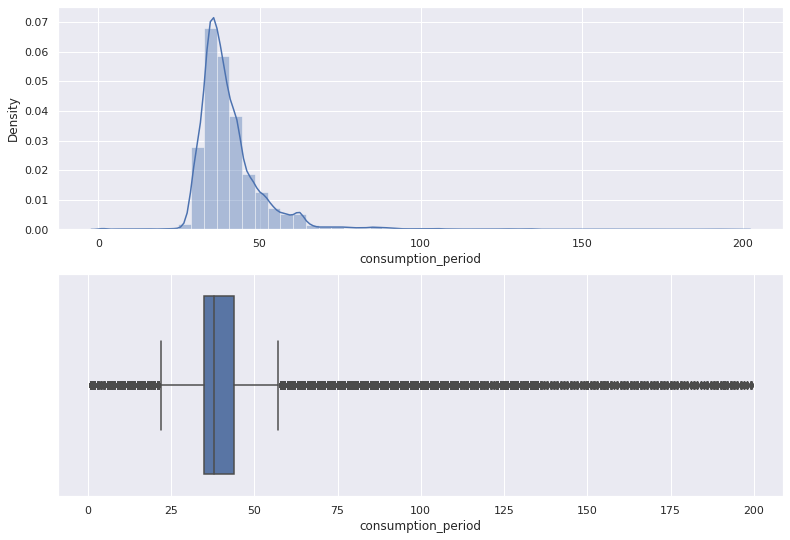

In [ ]:
fig, axs = plt.subplots(nrows= 2, figsize=(13,9))
hist_plot = sns.distplot(df["consumption_period"], ax = axs[0])
box_plot = sns.boxplot(df["consumption_period"], ax = axs[1])

(array([173.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.]),
 array([  0.        ,  26.66666667,  53.33333333,  80.        ,
        106.66666667, 133.33333333, 160.        , 186.66666667,
        213.33333333, 240.        , 266.66666667, 293.33333333,
        320.        , 346.66666667, 373.33333333, 400.        ,
        426.66666667, 453.33333333, 480.        , 506.66666667,
        533.33333333, 560.        , 586.66666667, 613.33333333,
        640.        , 666.66666667, 693.33333333, 720.        ,
        746.66666667, 773.33333333, 800.        ]),
 <a list of 30 Patch objects>)

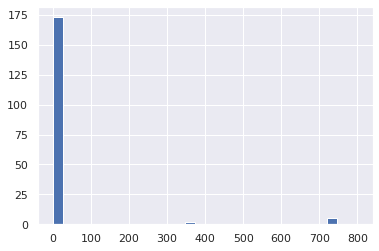

In [ ]:
plt.hist(df["course_bill_amount"],30, range=[0, 800], align='mid')


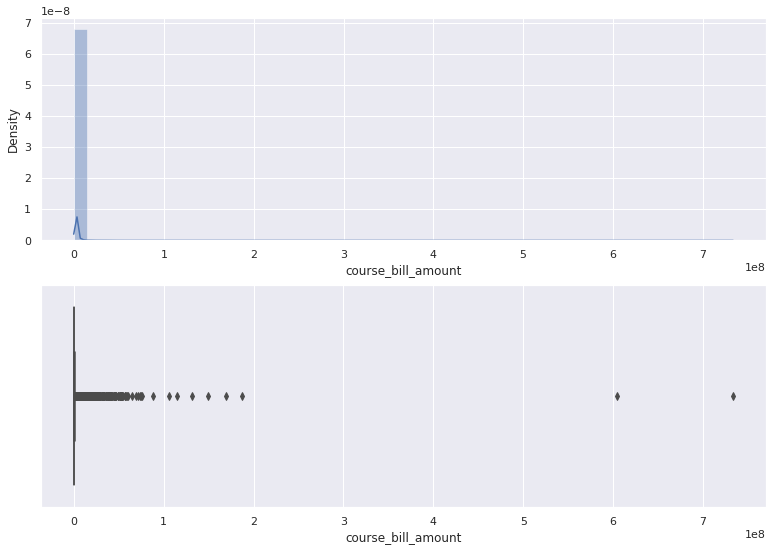

In [ ]:
fig, axs = plt.subplots(nrows= 2, figsize=(13,9))
hist_plot = sns.distplot(df["course_bill_amount"], ax = axs[0])
box_plot = sns.boxplot(df["course_bill_amount"], ax = axs[1])

(array([4.6202e+04, 1.3757e+05, 4.4256e+04, 1.0727e+04, 2.5730e+03,
        7.3500e+02, 3.2400e+02, 1.7200e+02, 9.4000e+01, 6.2000e+01,
        3.6000e+01, 2.1000e+01, 2.7000e+01, 8.0000e+00, 1.0000e+00,
        4.0000e+00, 1.0000e+01, 4.0000e+00, 6.0000e+00, 1.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300.]),
 <a list of 30 Patch objects>)

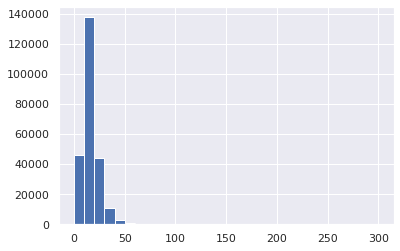

In [ ]:
plt.hist(df['avg_bill_consumption '],30, range=[0, 300], align='mid')

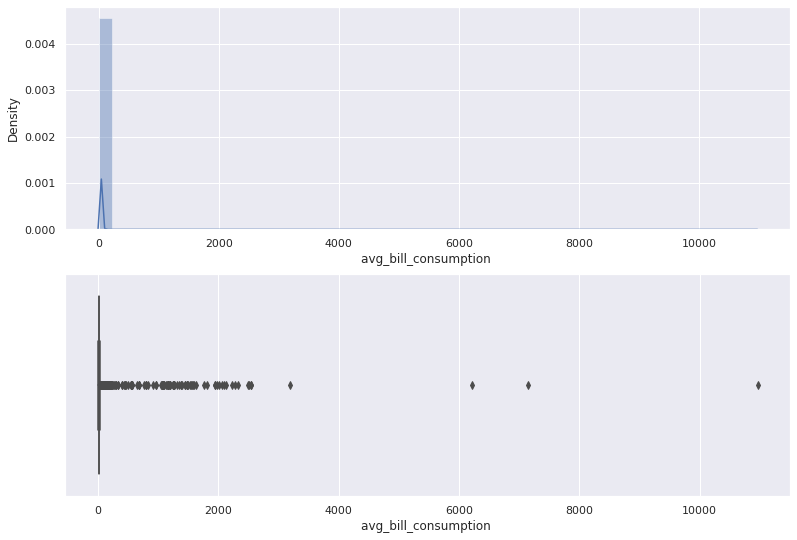

In [ ]:
fig, axs = plt.subplots(nrows= 2, figsize=(13,9))
hist_plot = sns.distplot(df['avg_bill_consumption '], ax = axs[0])
box_plot = sns.boxplot(df['avg_bill_consumption '], ax = axs[1])

(array([242938.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.]),
 array([  0.        ,  16.66666667,  33.33333333,  50.        ,
         66.66666667,  83.33333333, 100.        , 116.66666667,
        133.33333333, 150.        , 166.66666667, 183.33333333,
        200.        , 216.66666667, 233.33333333, 250.        ,
        266.66666667, 283.33333333, 300.        , 316.66666667,
        333.33333333, 350.        , 366.66666667, 383.33333333,
        400.        , 416.66666667, 433.33333333, 450.        ,
        466.66666667, 483.33333333, 500.        ]),
 <a list of 30 Patch objects>)

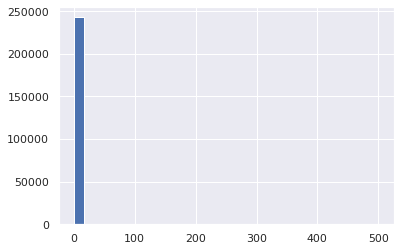

In [ ]:
plt.hist(df["diameter"],30, range=[0, 500], align='mid')


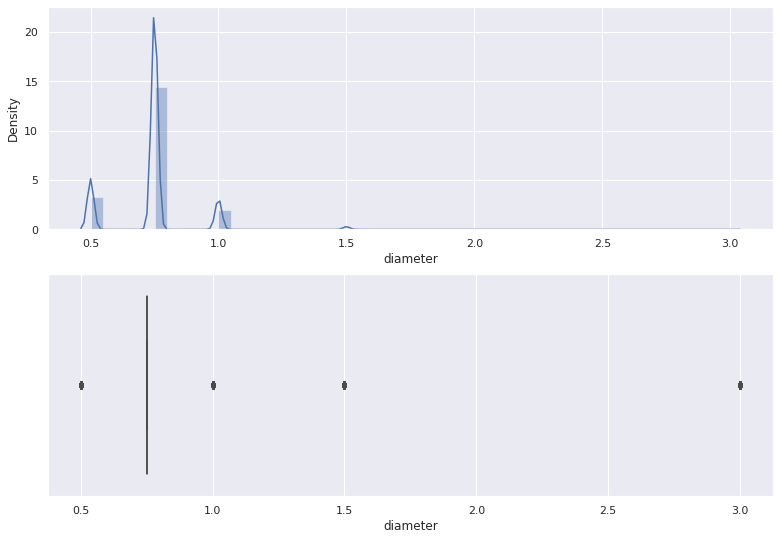

In [ ]:
fig, axs = plt.subplots(nrows= 2, figsize=(13,9))
hist_plot = sns.distplot(df['diameter'], ax = axs[0])
box_plot = sns.boxplot(df['diameter'], ax = axs[1])

In [ ]:
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

In [ ]:
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

In [ ]:
print("***************************  ********************************")
print("diameter:{}".format(lower_outlier(df,'diameter').shape[0]))
print("num_of_units:{}".format(lower_outlier(df,'num_of_units').shape[0]))
print("consumption: {}".format(lower_outlier(df,'consumption').shape[0]))
print("consumption_period: {}".format(lower_outlier(df,'consumption_period').shape[0]))
print("course_bill_amount: {}".format(lower_outlier(df,'course_bill_amount').shape[0]))
print("avg_bill_consumption : {}".format(lower_outlier(df,'avg_bill_consumption ').shape[0]))
print("correct_meter : {}".format(lower_outlier(df,'correct_meter ').shape[0]))
print("***************************  ********************************")
print("cluster_4k: {}".format(lower_outlier(df,'cluster_4k').shape[0]))

***************************  ********************************
diameter:40411
num_of_units:0
consumption: 0
consumption_period: 874
course_bill_amount: 0
avg_bill_consumption : 0
correct_meter : 5636
***************************  ********************************
cluster_4k: 0


In [ ]:
print("***************************  ********************************")
print("diameter:{}".format(upper_outlier(df,'diameter').shape[0]))
print("num_of_units:{}".format(upper_outlier(df,'num_of_units').shape[0]))
print("consumption: {}".format(upper_outlier(df,'consumption').shape[0]))
print("consumption_period: {}".format(upper_outlier(df,'consumption_period').shape[0]))
print("course_bill_amount: {}".format(upper_outlier(df,'course_bill_amount').shape[0]))
print("avg_bill_consumption : {}".format(upper_outlier(df,'avg_bill_consumption ').shape[0]))
print("correct_meter : {}".format(upper_outlier(df,'correct_meter ').shape[0]))
print("***************************  ********************************")
print("cluster_4k: {}".format(upper_outlier(df,'cluster_4k').shape[0]))

***************************  ********************************
diameter:26862
num_of_units:26648
consumption: 14385
consumption_period: 16340
course_bill_amount: 18304
avg_bill_consumption : 10684
correct_meter : 0
***************************  ********************************
cluster_4k: 0


In [ ]:
def new_df(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    df_new = df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]
    return df_new

In [ ]:
new_df(df, 'diameter')

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
179,1390,2,13,1.0,5,190,57,484808,20.000000,1,0
180,1390,3,24,1.0,5,136,41,349653,19.902439,1,0
181,1390,5,4,1.0,5,50,40,85868,7.500000,1,0
182,1390,6,15,1.0,5,127,40,320209,19.050000,1,0
183,1390,7,26,1.0,5,108,44,237029,14.727273,1,0
...,...,...,...,...,...,...,...,...,...,...,...
242381,1397,7,16,0.5,4,51,30,385927,12.750000,1,1
242382,1397,8,22,0.5,4,57,34,431451,12.573529,1,1
242383,1397,9,24,0.5,3,51,35,410405,14.571429,1,1
242384,1397,10,25,0.5,3,50,36,403907,13.888889,1,1


In [ ]:
print("Mode: {}".format(df.diameter.mode()))
print("Mean: {}".format(df.diameter.mean()))
print("Median: {}".format(df.diameter.median()))
print("25%: {}".format(df.diameter.quantile(0.25)))
print("75%: {}".format(df.diameter.quantile(0.75)))
print("10%: {}".format(df.diameter.quantile(0.10)))
print("90%: {}".format(df.diameter.quantile(0.90)))
print("min: {}".format(df.diameter.min()))
print("max: {}".format(df.diameter.max()))
# print(Q1['diameter'])
# print(Q3['diameter'])
print("lower: {}".format(Q1['diameter']-(1.5*IQR['diameter'])))
print("upper: {}".format(Q3['diameter']+(1.5*IQR['diameter'])))

Mode: 0    0.75
dtype: float64
Mean: 0.7414227086746412
Median: 0.75
25%: 0.75
75%: 0.75
10%: 0.5
90%: 1.0
min: 0.5
max: 3.0
lower: 0.75
upper: 0.75


In [ ]:
new_df(df, 'num_of_units')

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
1017,1396,12,5,1.00,12,48,29,2464556,4.137931,1,3
1018,1397,2,1,1.00,12,129,56,7032708,5.758929,1,2
1019,1397,3,2,1.00,12,65,33,3755561,4.924242,1,2
1020,1397,4,12,1.00,12,73,37,5290945,4.932432,1,2
1021,1397,5,14,1.00,12,65,34,4732718,4.779412,1,2
...,...,...,...,...,...,...,...,...,...,...,...
242924,1396,8,21,0.75,10,143,31,777415,13.838710,1,1
242925,1396,9,22,0.75,10,157,33,855300,14.272727,1,1
242926,1396,10,26,0.75,10,147,32,798934,13.781250,1,1
242927,1396,11,29,0.75,10,161,35,875104,13.800000,1,1


In [ ]:
print("Mode: {}".format(df.num_of_units.mode()))
print("Mean: {}".format(df.num_of_units.mean()))
print("Median: {}".format(df.num_of_units.median()))
print("25%: {}".format(df.num_of_units.quantile(0.25)))
print("75%: {}".format(df.num_of_units.quantile(0.75)))
print("10%: {}".format(df.num_of_units.quantile(0.10)))
print("90%: {}".format(df.num_of_units.quantile(0.90)))
print("min: {}".format(df.num_of_units.min()))
print("max: {}".format(df.num_of_units.max()))
print("lower: {}".format(Q1['num_of_units']-(1.5*IQR['num_of_units'])))
print("upper: {}".format(math.floor(Q3['num_of_units']+(1.5*IQR['num_of_units']))))

Mode: 0    3
dtype: int64
Mean: 4.697638903753221
Median: 4.0
25%: 2.0
75%: 5.0
10%: 1.0
90%: 10.0
min: 1
max: 396
lower: -2.5
upper: 9


In [ ]:
new_df(df, 'consumption')

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
196,1392,5,22,1.00,5,335,95,1052727,21.157895,1,0
197,1392,9,25,1.00,5,337,120,927923,16.850000,1,0
209,1394,7,28,1.00,5,272,82,1090917,19.902439,1,1
217,1395,7,24,1.00,5,832,103,21011131,48.466019,1,1
232,1397,4,12,1.00,5,275,126,1508257,13.095238,1,2
...,...,...,...,...,...,...,...,...,...,...,...
242895,1393,8,6,0.75,12,306,45,1028173,17.000000,1,3
242899,1394,1,29,0.75,12,275,57,799542,12.061404,1,1
242900,1394,3,17,0.75,12,296,50,943262,14.800000,1,2
242901,1394,4,30,0.75,12,295,43,1019545,17.151163,1,1


In [ ]:
print("Mode: {}".format(df.consumption.mode()))
print("Mean: {}".format(df.consumption.mean()))
print("Median: {}".format(df.consumption.median()))
print("25%: {}".format(df.consumption.quantile(0.25)))
print("75%: {}".format(df.consumption.quantile(0.75)))
print("10%: {}".format(df.consumption.quantile(0.10)))
print("90%: {}".format(df.consumption.quantile(0.90)))
print("min: {}".format(df.consumption.min()))
print("max: {}".format(df.consumption.max()))
print("lower: {}".format(Q1['consumption']-(1.5*IQR['consumption'])))
print("upper: {}".format(Q3['consumption']+(1.5*IQR['consumption'])))

Mode: 0    32
dtype: int64
Mean: 100.2439799455005
Median: 70.0
25%: 37.0
75%: 123.0
10%: 19.0
90%: 202.0
min: 0
max: 41961
lower: -92.0
upper: 252.0


In [ ]:
new_df(df, 'consumption_period')

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
8,1391,1,31,0.75,5,153,62,394945,14.806452,1,0
17,1392,2,31,0.75,5,160,62,479255,15.483871,1,0
18,1392,3,22,0.75,5,48,20,139961,14.400000,1,0
122,1391,1,31,0.75,6,111,62,200277,8.951613,1,0
131,1392,2,31,0.75,6,145,62,336878,11.693548,1,0
...,...,...,...,...,...,...,...,...,...,...,...
242860,1393,4,11,0.75,4,6,76,12721,0.592105,1,2
242862,1393,8,6,0.75,4,5,79,10601,0.474684,1,3
242864,1394,1,29,0.75,4,5,133,10656,0.281955,1,1
242873,1391,1,26,0.75,12,501,65,1273552,19.269231,1,0


In [ ]:
print("Mode: {}".format(df.consumption_period.mode()))
print("Mean: {}".format(df.consumption_period.mean()))
print("Median: {}".format(df.consumption_period.median()))
print("25%: {}".format(df.consumption_period.quantile(0.25)))
print("75%: {}".format(df.consumption_period.quantile(0.75)))
print("10%: {}".format(df.consumption_period.quantile(0.10)))
print("90%: {}".format(df.consumption_period.quantile(0.90)))
print("min: {}".format(df.consumption_period.min()))
print("max: {}".format(df.consumption_period.max()))
print("lower: {}".format(Q1['consumption_period']-(1.5*IQR['consumption_period'])))
print("upper: {}".format(Q3['consumption_period']+(1.5*IQR['consumption_period'])))

Mode: 0    35
dtype: int64
Mean: 41.23903629732689
Median: 38.0
25%: 35.0
75%: 44.0
10%: 32.0
90%: 53.0
min: 1
max: 199
lower: 21.5
upper: 57.5


In [ ]:
new_df(df, 'course_bill_amount')

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
76,1394,4,3,0.75,1,149,54,7689566,82.777778,1,2
77,1394,5,24,0.75,1,118,43,6057623,82.325581,1,1
78,1394,6,24,0.75,1,115,37,6574156,93.243243,1,1
82,1394,11,20,0.75,1,63,36,2732214,52.500000,1,1
83,1394,12,11,0.75,1,47,30,1527081,47.000000,1,3
...,...,...,...,...,...,...,...,...,...,...,...
242884,1392,5,16,0.75,12,463,48,1609795,24.114583,1,0
242893,1393,5,19,0.75,12,338,39,1317575,21.666667,1,0
242906,1394,11,3,0.75,12,234,34,1271090,17.205882,1,3
242918,1396,1,28,0.75,11,266,54,1419584,13.434343,1,1


In [ ]:
print("Mode: {}".format(df.course_bill_amount.mode()))
print("Mean: {}".format(df.course_bill_amount.mean()))
print("Median: {}".format(df.course_bill_amount.median()))
print("25%: {}".format(df.course_bill_amount.quantile(0.25)))
print("75%: {}".format(df.course_bill_amount.quantile(0.75)))
print("10%: {}".format(df.course_bill_amount.quantile(0.10)))
print("90%: {}".format(df.course_bill_amount.quantile(0.90)))
print("min: {}".format(df.course_bill_amount.min()))
print("max: {}".format(df.course_bill_amount.max()))
print("lower: {}".format(Q1['course_bill_amount']-(1.5*IQR['course_bill_amount'])))
print("upper: {}".format(Q3['course_bill_amount']+(1.5*IQR['course_bill_amount'])))

Mode: 0    0
dtype: int64
Mean: 519556.15992969397
Median: 292096.0
25%: 143476.0
75%: 572467.0
10%: 69579.0
90%: 1043307.0000000005
min: 0
max: 733372912
lower: -500010.5
upper: 1215953.5


In [ ]:
df.columns

Index(['year_of_issue', 'month_of_issue', 'day_of_issue', 'diameter',
       'num_of_units', 'consumption', 'consumption_period',
       'course_bill_amount', 'avg_bill_consumption ', 'correct_meter ',
       'cluster_4k'],
      dtype='object')

In [ ]:
new_df(df, 'avg_bill_consumption ')

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
74,1393,12,9,0.75,1,62,42,893824,44.285714,1,3
75,1394,2,14,0.75,1,82,57,1105500,43.157895,1,2
76,1394,4,3,0.75,1,149,54,7689566,82.777778,1,2
77,1394,5,24,0.75,1,118,43,6057623,82.325581,1,1
78,1394,6,24,0.75,1,115,37,6574156,93.243243,1,1
...,...,...,...,...,...,...,...,...,...,...,...
242789,1393,3,7,0.75,2,99,41,724278,36.219512,1,2
242790,1393,4,11,0.75,2,88,35,688930,37.714286,1,2
242791,1393,5,19,0.75,2,106,39,968852,40.769231,1,0
242792,1393,6,24,0.75,2,94,32,1078853,44.062500,1,0


In [ ]:
print("Mode: {}".format(df['avg_bill_consumption '].mode()))
print("Mean: {}".format(df['avg_bill_consumption '].mean()))
print("Median: {}".format(df['avg_bill_consumption '].median()))
print("25%: {}".format(df['avg_bill_consumption '].quantile(0.25)))
print("75%: {}".format(df['avg_bill_consumption '].quantile(0.75)))
print("10%: {}".format(df['avg_bill_consumption '].quantile(0.10)))
print("90%: {}".format(df['avg_bill_consumption '].quantile(0.90)))
print("min: {}".format(df['avg_bill_consumption '].min()))
print("max: {}".format(df['avg_bill_consumption '].max()))
print("lower: {}".format(Q1['avg_bill_consumption ']-(1.5*IQR['avg_bill_consumption '])))
print("upper: {}".format(Q3['avg_bill_consumption ']+(1.5*IQR['avg_bill_consumption '])))

Mode: 0    15.0
dtype: float64
Mean: 16.85260435099416
Median: 15.0
25%: 11.39534883720907
75%: 19.772727272727273
10%: 7.083333333333333
90%: 26.153846153846153
min: 0.0
max: 10959.0
lower: -1.1707188160682342
upper: 32.33879492600458


In [ ]:
def upper_replace(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))] = Q3[col]
    print('outlire replace with Q3') 

In [ ]:
def lower_replace(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))] = Q1[col]
    print('outlire replace with Q1')

In [ ]:
def median_replace(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))] = df[col].median()
    print('outlire replace with median')

In [ ]:
def replace_nan(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    df[col] = df[col].where(lambda x: (x > (q1_col - 1.5 * iqr_col)), np.nan)
    df[col] = df[col].where(lambda x: (x < (q3_col + 1.5 * iqr_col)), np.nan)
    print('outlire replace with nan') 

In [ ]:
def replace_nan_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    df[col] = df[col].where(lambda x: (x > (q1_col - 1.5 * iqr_col)), np.nan)
    print('outlire replace with nan - lower') 

In [ ]:
def replace_nan_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    df[col] = df[col].where(lambda x: (x < (q3_col + 1.5 * iqr_col)), np.nan)
    print('outlire replace with nan - upper') 

In [ ]:
print("***************************  ********************************")
print("diameter:{}".format(upper_outlier(df,'diameter').shape[0]))
print("num_of_units:{}".format(upper_outlier(df,'num_of_units').shape[0]))
print("consumption: {}".format(upper_outlier(df,'consumption').shape[0]))
print("consumption_period: {}".format(upper_outlier(df,'consumption_period').shape[0]))
print("course_bill_amount: {}".format(upper_outlier(df,'course_bill_amount').shape[0]))
print("avg_bill_consumption : {}".format(upper_outlier(df,'avg_bill_consumption ').shape[0]))
print("correct_meter : {}".format(upper_outlier(df,'correct_meter ').shape[0]))
print("***************************  ********************************")
print("cluster_4k: {}".format(upper_outlier(df,'cluster_4k').shape[0]))

***************************  ********************************
diameter:26862
num_of_units:26648
consumption: 14385
consumption_period: 16340
course_bill_amount: 18304
avg_bill_consumption : 10684
correct_meter : 0
***************************  ********************************
cluster_4k: 0


In [ ]:
replace_nan(df, 'num_of_units')
replace_nan(df, 'consumption')
replace_nan(df, 'course_bill_amount')
replace_nan(df, 'avg_bill_consumption ')

outlire replace with nan
outlire replace with nan
outlire replace with nan
outlire replace with nan


In [ ]:
df.isnull().sum()

year_of_issue                0
month_of_issue               0
day_of_issue                 0
diameter                     0
num_of_units             26648
consumption              14537
consumption_period           0
course_bill_amount       18304
avg_bill_consumption     10684
correct_meter                0
cluster_4k                   0
dtype: int64

In [ ]:
df['num_of_units'] = df['num_of_units'].fillna(math.floor(Q3['num_of_units']+(1.5*IQR['num_of_units'])))
df['consumption'] = df['consumption'].fillna(Q3['consumption']+(1.5*IQR['consumption']))
df['course_bill_amount'] = df['course_bill_amount'].fillna(Q3['course_bill_amount']+(1.5*IQR['course_bill_amount']))
df['avg_bill_consumption '] = df['avg_bill_consumption '].fillna(Q3['avg_bill_consumption ']+(1.5*IQR['avg_bill_consumption ']))

In [ ]:
print("num_of_units:{}".format(outlier_detect_new(df,'num_of_units').shape[0]))
print("consumption: {}".format(outlier_detect_new(df,'consumption').shape[0]))
print("course_bill_amount: {}".format(outlier_detect_new(df,'course_bill_amount').shape[0]))
print("avg_bill_consumption: {}".format(outlier_detect_new(df,'avg_bill_consumption ').shape[0]))

num_of_units:0
consumption: 0
course_bill_amount: 0
avg_bill_consumption: 0


In [ ]:
replace_nan_lower(df, 'consumption_period')
df['consumption_period'] = df['consumption_period'].fillna(Q1['consumption_period']-(1.5*IQR['consumption_period']))


outlire replace with nan - lower


In [ ]:
replace_nan_lower(df, 'diameter')
df['diameter'] = df['diameter'].fillna(Q1['diameter']-(1.5*IQR['diameter']))


outlire replace with nan - lower


In [ ]:
replace_nan_upper(df, 'consumption_period')
df['consumption_period'] = df['consumption_period'].fillna(Q3['consumption_period']+(1.5*IQR['consumption_period']))


outlire replace with nan - upper


In [ ]:
replace_nan_upper(df, 'diameter')
df['diameter'] = df['diameter'].fillna(round(Q3['diameter']+(1.5*IQR['diameter'])))


outlire replace with nan - upper


In [ ]:
df.isnull().sum()

year_of_issue            0
month_of_issue           0
day_of_issue             0
diameter                 0
num_of_units             0
consumption              0
consumption_period       0
course_bill_amount       0
avg_bill_consumption     0
correct_meter            0
cluster_4k               0
dtype: int64

In [ ]:
print("num_of_units:{}".format(outlier_detect_new(df,'num_of_units').shape[0]))
print("consumption: {}".format(outlier_detect_new(df,'consumption').shape[0]))
print("course_bill_amount: {}".format(outlier_detect_new(df,'course_bill_amount').shape[0]))
print("avg_bill_consumption: {}".format(outlier_detect_new(df,'avg_bill_consumption ').shape[0]))
print("*****************************************************")
print("consumption_period: {}".format(outlier_detect_new(df,'consumption_period').shape[0]))
print("diameter: {}".format(outlier_detect_new(df,'diameter').shape[0]))

num_of_units:0
consumption: 0
course_bill_amount: 0
avg_bill_consumption: 0
*****************************************************
consumption_period: 0
diameter: 242938


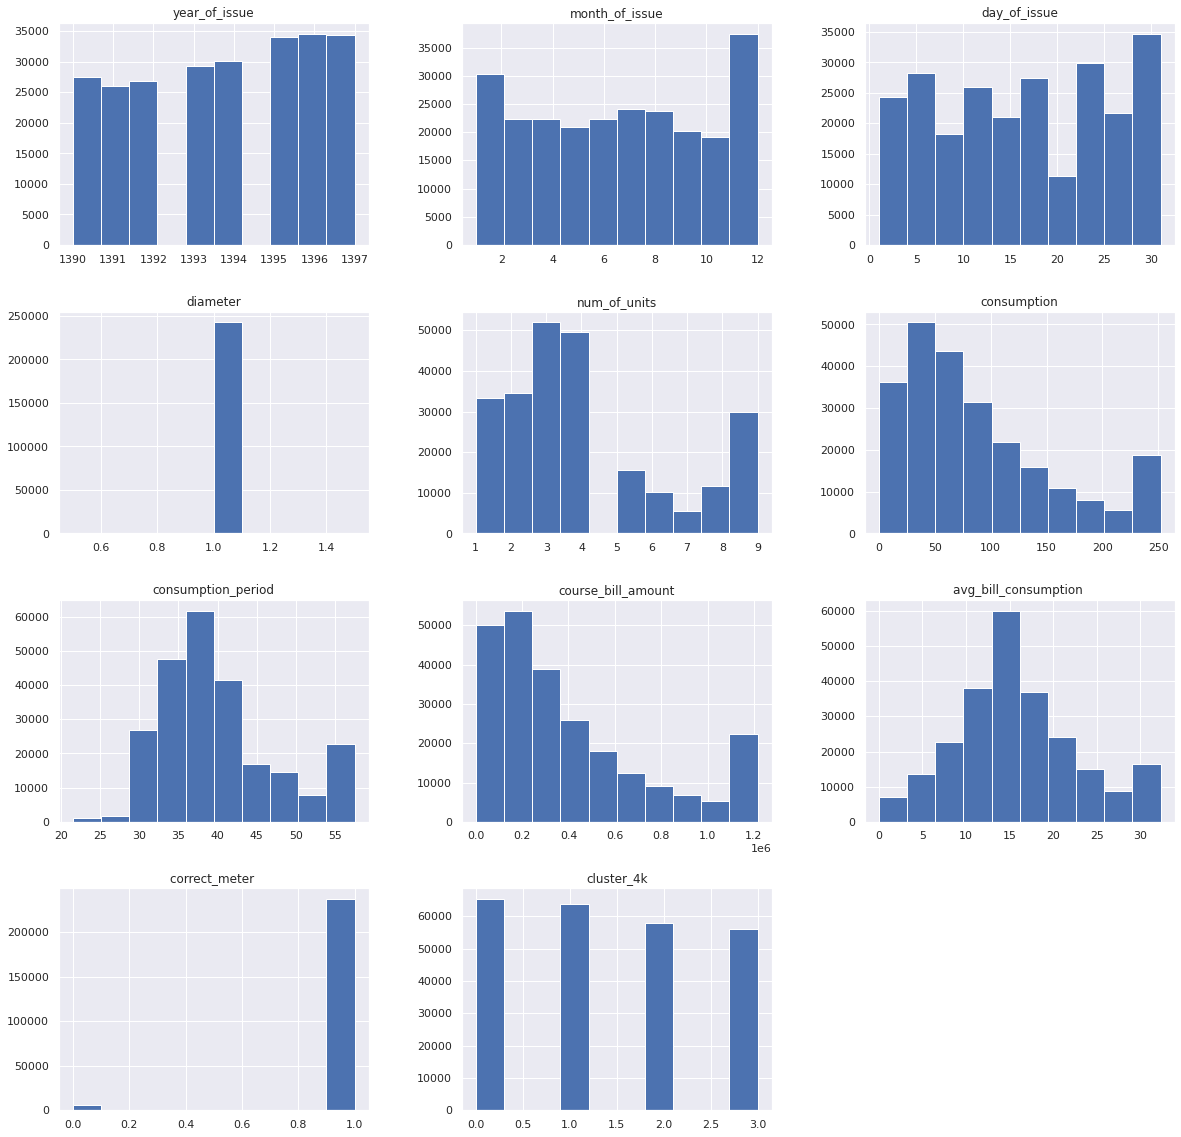

In [ ]:
p = df.hist(figsize = (20,20))

## `Handle Duplicate Value`

In [ ]:
df.loc[df.duplicated()].shape

(31132, 11)

In [ ]:
df[df.duplicated()]

,year_of_issue,month_of_issue,day_of_issue,diameter,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
407,1394,8,26,1.0,4.0,84.0,39.0,393349.0,16.153846,1,1
527,1391,11,14,1.0,5.0,76.0,30.0,187771.0,15.200000,1,3
827,1394,3,24,1.0,3.0,60.0,50.0,176849.0,12.000000,1,1
1016,1393,4,18,1.0,1.0,39.0,36.0,242700.0,32.338795,1,0
1060,1394,5,6,1.0,5.0,171.0,43.0,732700.0,23.860465,1,2
...,...,...,...,...,...,...,...,...,...,...,...
242794,1393,9,15,1.0,2.0,56.0,39.0,217214.0,21.538462,1,3
242811,1395,7,14,1.0,2.0,51.0,36.0,319994.0,21.250000,1,2
242826,1397,2,26,1.0,2.0,37.0,34.0,210983.0,16.323529,1,1
242835,1390,2,7,1.0,4.0,30.0,49.0,43723.0,4.591837,1,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(211806, 11)

In [ ]:
df.drop(['diameter'], axis=1, inplace=True)
df.head()

,year_of_issue,month_of_issue,day_of_issue,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter,cluster_4k
0,1390,2,14,5.0,125.0,49.0,322419.0,15.306122,1,0
1,1390,3,28,5.0,97.0,47.0,232750.0,12.382979,1,0
2,1390,5,5,5.0,90.0,37.0,229050.0,14.594595,1,0
3,1390,6,20,5.0,93.0,47.0,219314.0,11.872340,1,0
4,1390,7,30,5.0,83.0,41.0,197606.0,12.146341,1,0


# ----------------------------------------------------------------------------------------------------------

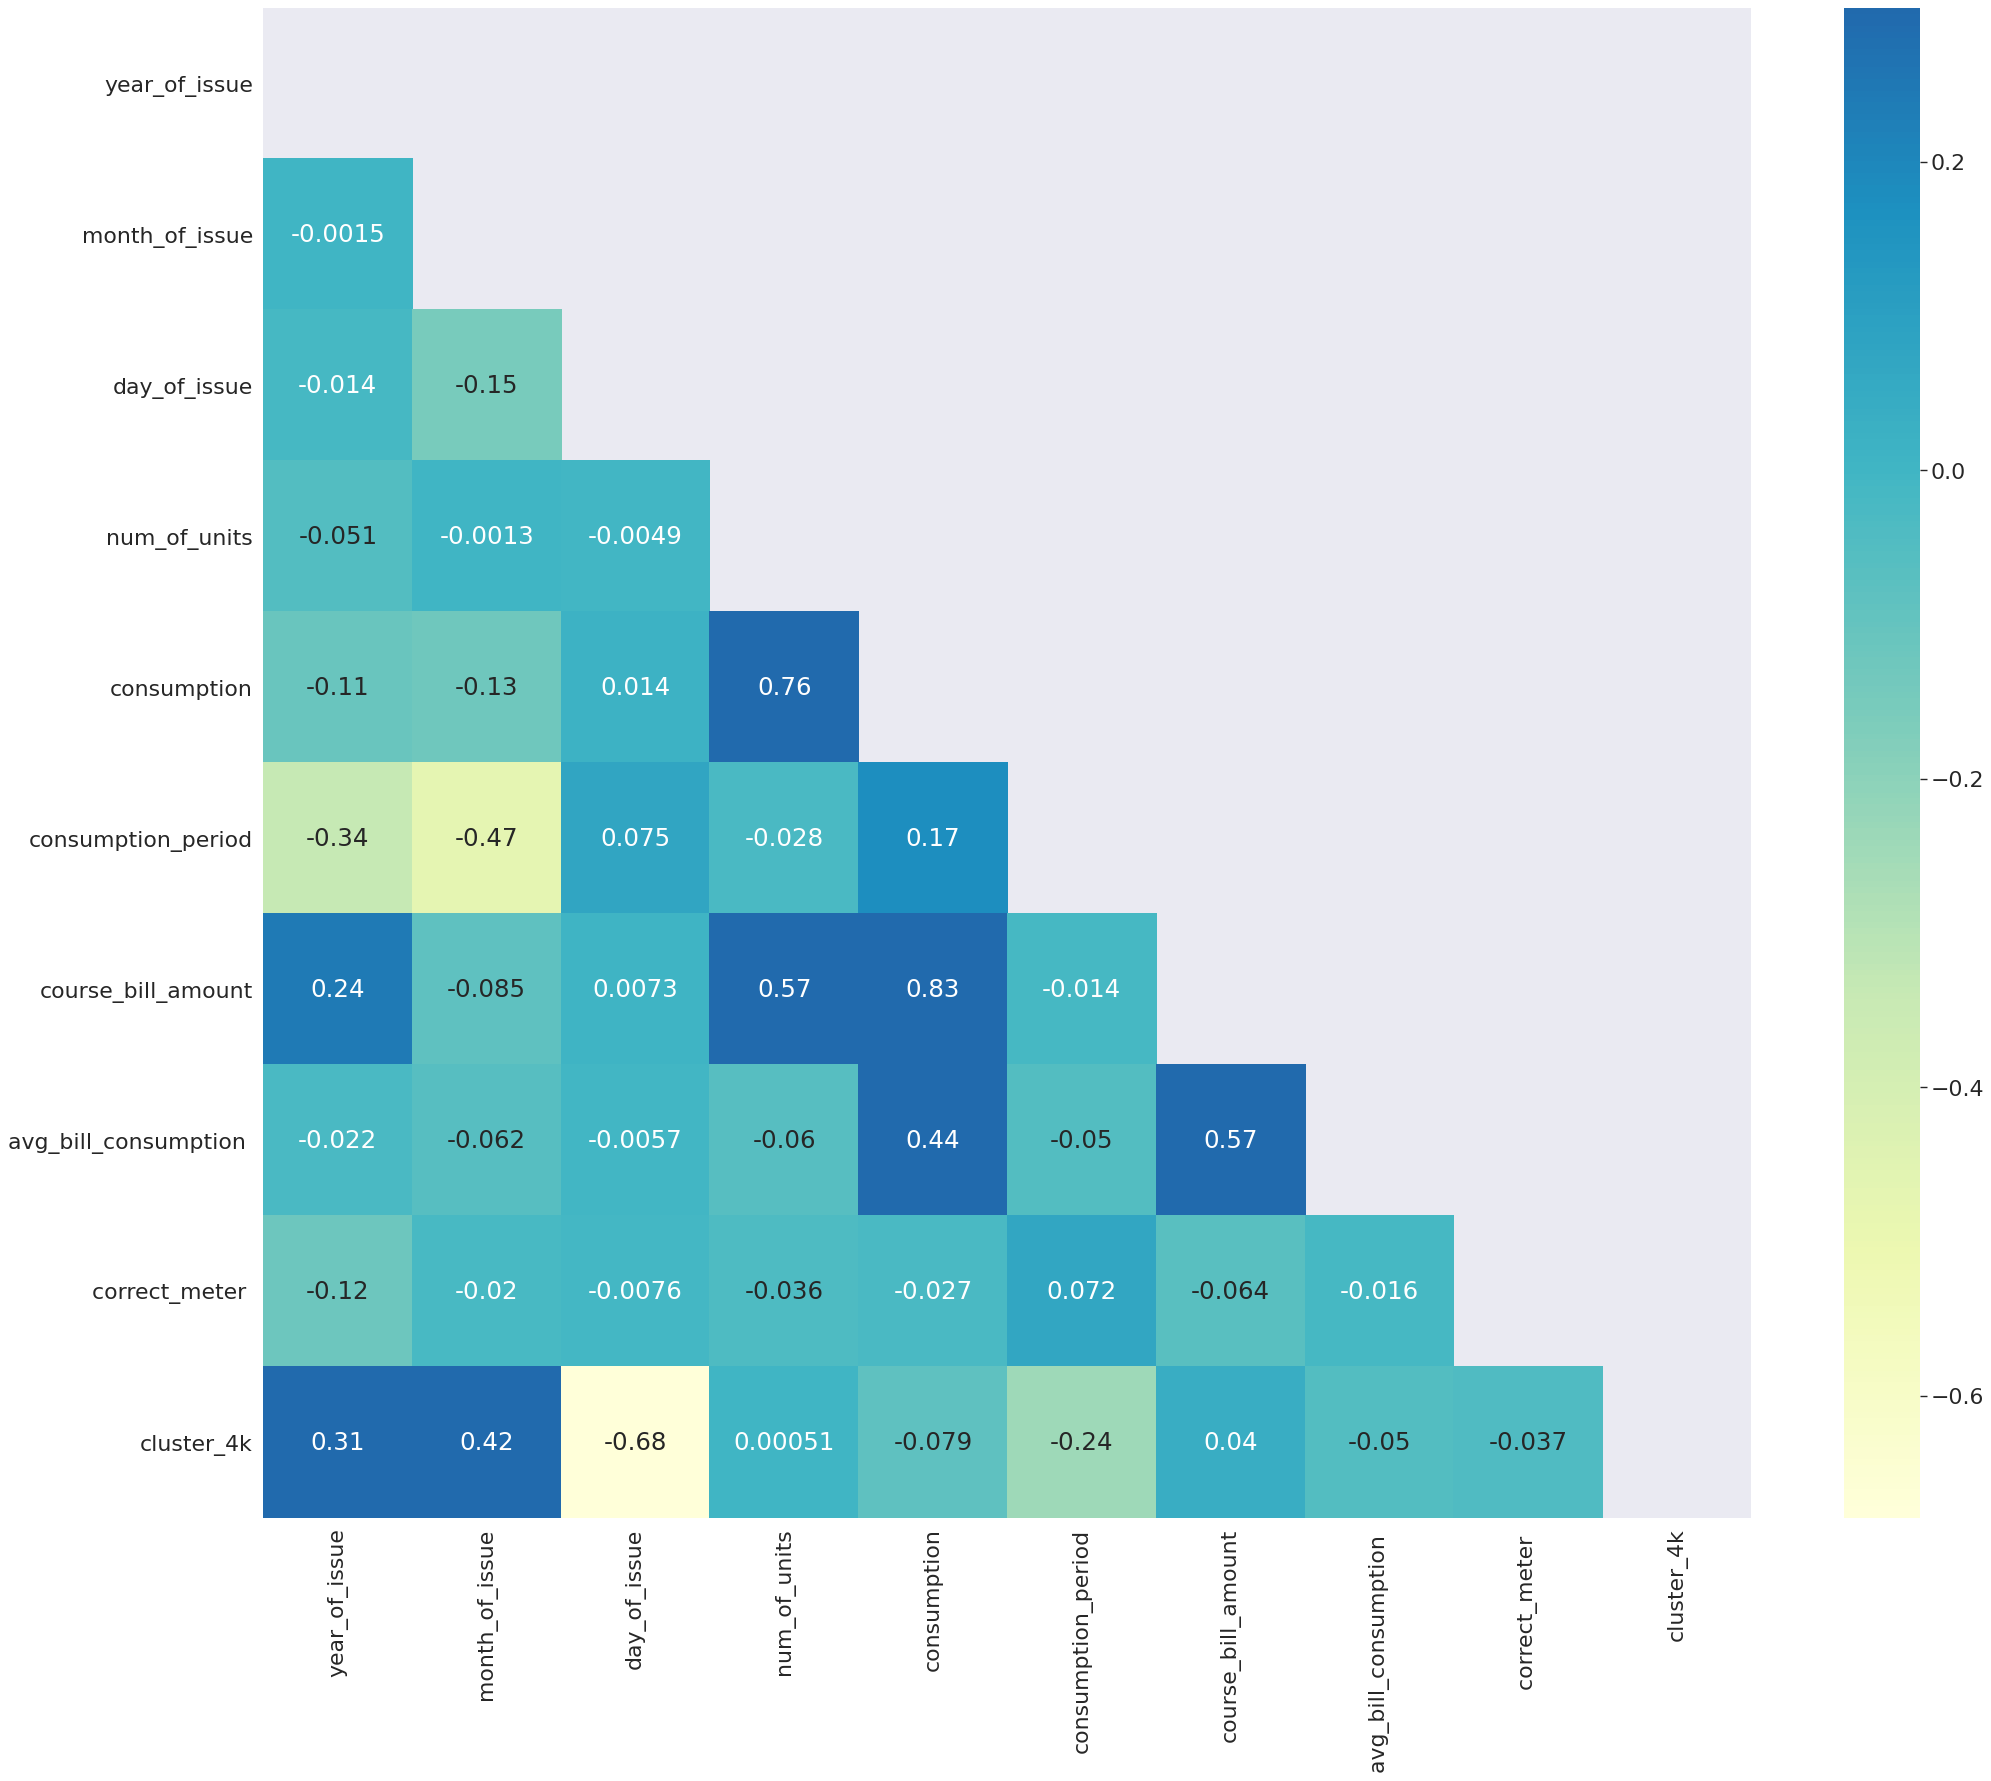

In [ ]:
mask = np.triu(np.ones_like(df.corr()))
fig, ax = plt.subplots(figsize=(30,25),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), mask= mask, cmap="YlGnBu", vmax=.3, annot = True, center = 0,annot_kws={"fontsize":22})
# fig.savefig('heatmap.jpg', bbox_inches='tight')

# `Modeling`

### `Convert continuous  target to binary target` 

In [ ]:
x = df.drop("cluster_4k", axis = 1)
y = df['cluster_4k']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 100,stratify=y, test_size = 0.3)
print(y_train.value_counts())

0    40627
1    38270
2    35897
3    33470
Name: cluster_4k, dtype: int64


In [ ]:
scale = MinMaxScaler()

col = ['year_of_issue','month_of_issue', 'day_of_issue','num_of_units', 'consumption', 'consumption_period',
       'course_bill_amount', 'avg_bill_consumption ', 'correct_meter ']

x_train[col] = scale.fit_transform(x_train[col])
x_train.head()

,year_of_issue,month_of_issue,day_of_issue,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter
98137,0.714286,0.545455,0.566667,0.125,0.123016,0.347222,0.154742,0.422912,1.0
121759,0.142857,0.818182,0.366667,0.125,0.119048,0.458333,0.055055,0.366189,1.0
7109,1.000000,0.363636,0.300000,0.625,0.353175,0.319444,0.414863,0.416987,1.0
192338,0.714286,0.000000,0.766667,0.000,0.095238,0.763889,0.104801,0.454373,0.0
116696,0.857143,0.545455,0.766667,0.125,0.115079,0.513889,0.134414,0.336283,1.0


In [ ]:
x_test[col] = scale.transform(x_test[col])
x_test.head()

,year_of_issue,month_of_issue,day_of_issue,num_of_units,consumption,consumption_period,course_bill_amount,avg_bill_consumption,correct_meter
159184,0.714286,1.000000,0.100000,0.000,0.015873,0.347222,0.031433,0.109139,1.0
92091,0.285714,0.727273,0.800000,0.250,0.269841,0.597222,0.148608,0.489009,1.0
223089,0.857143,0.818182,0.833333,0.375,0.452381,0.347222,0.658493,0.777613,0.0
118888,0.142857,0.454545,0.100000,0.125,0.095238,0.458333,0.036263,0.292951,1.0
212548,0.000000,0.545455,0.733333,0.250,0.071429,0.597222,0.021784,0.129443,1.0


0    58039
1    54672
2    51281
3    47814
Name: cluster_4k, dtype: int64

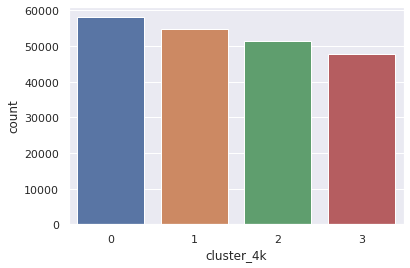

In [ ]:
sns.set(font_scale=1)
sns.countplot(x = "cluster_4k", data = df)
df.loc[:, 'cluster_4k'].value_counts()

In [ ]:
x.shape

(211806, 9)

In [ ]:
x_train_copy = x_train
x_train_copy.shape

(148264, 9)

In [ ]:
x_test_copy = x_test
x_test_copy.shape

(63542, 9)

### `Check the features ` 

In [ ]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False,)
    return(vif)

In [ ]:
checkVIF(x).reset_index(drop=True)

,Features,VIF
0,year_of_issue,143.84
1,consumption_period,47.96
2,correct_meter,42.62
3,consumption,26.25
4,num_of_units,21.58
5,avg_bill_consumption,17.99
6,course_bill_amount,10.03
7,month_of_issue,6.64
8,day_of_issue,4.20


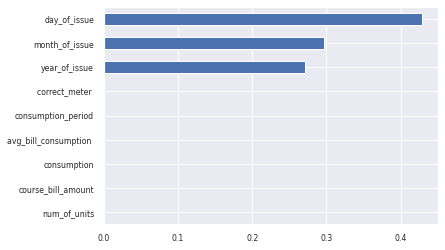

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
feat_importances1 = pd.Series(dt.feature_importances_, index=x_train.columns)
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

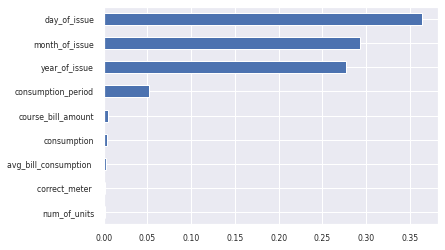

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
feat_importances1 = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

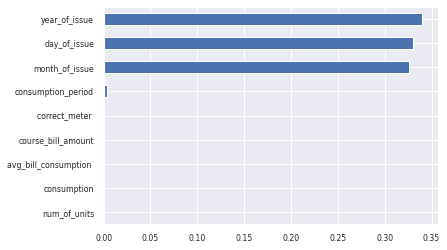

In [ ]:
gb = SClassifier()
gb.fit(x_train,y_train)
feat_importances1 = pd.Series(gb.feature_importances_, index=x_train.columns)
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

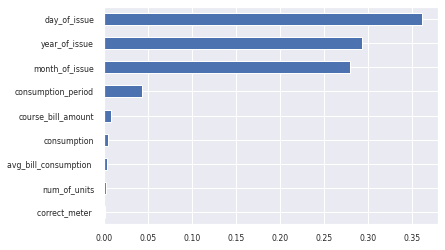

In [ ]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
feat_importances1 = pd.Series(et.feature_importances_, index=x_train.columns)
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

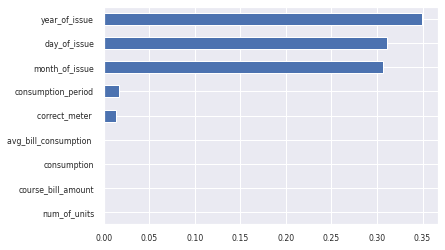

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
feat_importances1 = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

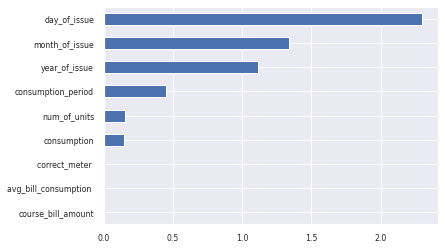

In [ ]:
#alphas = [0.0001, 0.001, 0.01, 0.1]
ls = LassoCV(max_iter=100, random_state=100, n_jobs=-1)
clf = ls.fit(x_train, y_train)
importance = np.abs(clf.coef_)
frame = pd.Series(importance, x_train.columns)
frame.sort_values(ascending = True).plot(kind='barh')
plt.show()

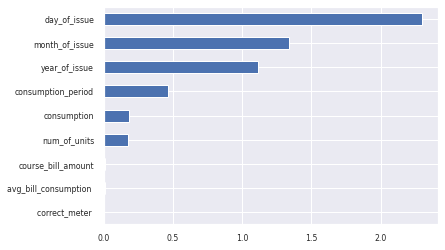

In [ ]:
en = ElasticNet(max_iter=100, alpha=0.0001, random_state=100, selection='cyclic')
clf = en.fit(x_train, y_train)
importance = np.abs(clf.coef_)
frame = pd.Series(importance, x_train.columns)
frame.sort_values(ascending = True).plot(kind='barh')
plt.show()

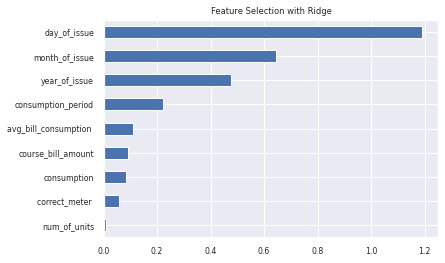

In [ ]:
r = Ridge(max_iter=100, random_state=100, normalize=True)
clf = r.fit(x_train, y_train)
importance = np.abs(clf.coef_)
frame = pd.Series(importance, x_train.columns)
frame.sort_values(ascending = True).plot(kind='barh', )
plt.title("Feature Selection with Ridge")
plt.savefig('Ridge2.png', bbox_inches='tight')
plt.show()

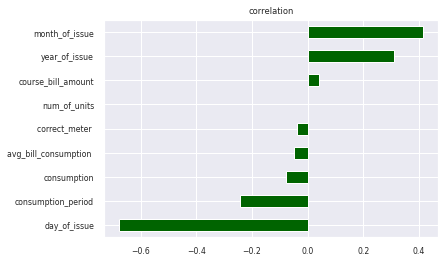

In [ ]:
correlation=(df.corr()['cluster_4k'])
del correlation['cluster_4k']
correlation.sort_values(ascending=True).plot(kind='barh',color = "darkgreen")
plt.title("correlation")
# plt.savefig('correlation.png', bbox_inches='tight')
plt.show()

### `Selected features ` 

In [ ]:
x_train_new = x_train
x_test_new = x_test
x_new = x

In [ ]:
# new selection
x_train_new = x_train[['month_of_issue', 'day_of_issue', 'consumption_period',
       'consumption', 'avg_bill_consumption ']]

x_test_new = x_test[['month_of_issue', 'day_of_issue', 'consumption_period',
       'consumption', 'avg_bill_consumption ']]
       
x_new = x[['month_of_issue', 'day_of_issue', 'consumption_period',
       'consumption', 'avg_bill_consumption ']]

In [ ]:
x_train_new.columns

Index(['month_of_issue', 'day_of_issue', 'consumption_period', 'consumption',
       'avg_bill_consumption '],
      dtype='object')

# `Decision Tree`

In [ ]:
DT = DecisionTreeClassifier(random_state=0)

DT.fit(x_train_new, y_train)

y_test_pred_DT = DT.predict(x_test_new)
y_train_pred_DT = DT.predict(x_train_new)

test_acc_DT = accuracy_score(y_test, y_test_pred_DT)
train_acc_DT = accuracy_score(y_train, y_train_pred_DT)
scores_DT = cross_val_score(DT, x_new , y , cv = 10, scoring = 'accuracy' ) 

precision_score_DT = precision_score(y_test, y_test_pred_DT, average = 'macro')
recall_score_DT = recall_score(y_test, y_test_pred_DT, average = 'macro')
f1_score_DT = f1_score(y_test, y_test_pred_DT, average = 'macro')
conf_DT = confusion_matrix(y_test, y_test_pred_DT)


print("Tain set Accuracy: ", train_acc_DT)
print("Test set Accuracy: ", test_acc_DT)
print("cv: %s\n"% scores_DT.mean())
print("************************************************")
print("precision_score: ", precision_score_DT)
print("recall_score: ", recall_score_DT)
print("f1_score: ", f1_score_DT)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_DT))

Tain set Accuracy:  0.9987926941132035
Test set Accuracy:  0.976173239746939
cv: 0.961001816529941

************************************************
precision_score:  0.977234940681238
recall_score:  0.9771739264230802
f1_score:  0.9772033644758051
************************************************

Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17412
           1       0.97      0.97      0.97     16402
           2       0.98      0.98      0.98     15384
           3       1.00      1.00      1.00     14344

    accuracy                           0.98     63542
   macro avg       0.98      0.98      0.98     63542
weighted avg       0.98      0.98      0.98     63542




# `Random Forest`

In [ ]:
RF = RandomForestClassifier(random_state=0)
RF.fit(x_train_new, y_train)

y_test_pred_RF = RF.predict(x_test_new)
y_train_pred_RF = RF.predict(x_train_new)

test_acc_RF = accuracy_score(y_test, y_test_pred_RF)
train_acc_RF = accuracy_score(y_train, y_train_pred_RF)
scores_RF = cross_val_score(RF, x_new , y , cv = 10, scoring = 'accuracy' ) 

precision_score_RF = precision_score(y_test, y_test_pred_RF, average='macro')
recall_score_RF = recall_score(y_test, y_test_pred_RF, average='macro')
f1_score_RF = f1_score(y_test, y_test_pred_RF, average='macro')
conf_RF = confusion_matrix(y_test, y_test_pred_RF)


print("Tain set Accuracy: ", train_acc_RF)
print("Test set Accuracy: ", test_acc_RF)
print("cv: %s\n"% scores_RF.mean())
print("************************************************")
print("precision_score: ", precision_score_RF)
print("recall_score: ", recall_score_RF)
print("f1_score: ", f1_score_RF)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_RF))

Tain set Accuracy:  0.9987926941132035
Test set Accuracy:  0.9810991155456233
cv: 0.9692971525739369

************************************************
precision_score:  0.9818823712054792
recall_score:  0.9819641808085136
f1_score:  0.9819198384413615
************************************************

Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17412
           1       0.98      0.97      0.98     16402
           2       0.98      0.99      0.99     15384
           3       1.00      1.00      1.00     14344

    accuracy                           0.98     63542
   macro avg       0.98      0.98      0.98     63542
weighted avg       0.98      0.98      0.98     63542




# `Neural Network`

In [ ]:
MLP = MLPClassifier(random_state=0)
MLP.fit(x_train_new, y_train)

y_test_pred_MLP = MLP.predict(x_test_new)
y_train_pred_MLP = MLP.predict(x_train_new)

test_acc_MLP = accuracy_score(y_test, y_test_pred_MLP)
train_acc_MLP = accuracy_score(y_train, y_train_pred_MLP)
scores_MLP = cross_val_score(MLP, x_new , y , cv = 10, scoring = 'accuracy' )

precision_score_MLP = precision_score(y_test, y_test_pred_MLP, average='macro')
recall_score_MLP = recall_score(y_test, y_test_pred_MLP, average='macro')
f1_score_MLP = f1_score(y_test, y_test_pred_MLP, average='macro')
conf_MLP = confusion_matrix(y_test, y_test_pred_MLP)


print("Tain set Accuracy: ", train_acc_MLP)
print("Test set Accuracy: ", test_acc_MLP)
print("cv:  %s\n"% scores_MLP.mean())
print("************************************************")
print("precision_score: ", precision_score_MLP)
print("recall_score: ", recall_score_MLP)
print("f1_score: ", f1_score_MLP)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_MLP))

Tain set Accuracy:  0.9577780175902444
Test set Accuracy:  0.9582953007459633
cv:  0.9245721745650233

************************************************
precision_score:  0.960230703455011
recall_score:  0.9600257214335992
f1_score:  0.9601228299912135
************************************************

Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     17412
           1       0.96      0.95      0.95     16402
           2       0.96      0.96      0.96     15384
           3       1.00      1.00      1.00     14344

    accuracy                           0.96     63542
   macro avg       0.96      0.96      0.96     63542
weighted avg       0.96      0.96      0.96     63542




# `SVM`

In [ ]:
SVM = SVC(probability=True)
SVM.fit(x_train_new, y_train)

y_test_pred_SVM = SVM.predict(x_test_new)
y_train_pred_SVM = SVM.predict(x_train_new)

test_acc_SVM = accuracy_score(y_test, y_test_pred_SVM)
train_acc_SVM = accuracy_score(y_train, y_train_pred_SVM)
# scores_SVM = cross_val_score(SVM, x_new , y , cv = 10, scoring = 'accuracy' )

precision_score_SVM = precision_score(y_test, y_test_pred_SVM, average='macro')
recall_score_SVM = recall_score(y_test, y_test_pred_SVM, average='macro')
f1_score_SVM = f1_score(y_test, y_test_pred_SVM, average='macro')
conf_SVM = confusion_matrix(y_test, y_test_pred_SVM)


print("Tain set Accuracy: ", train_acc_SVM)
print("Test set Accuracy: ", test_acc_SVM)
# print("cv: %s\n"% scores_SVM.mean())
print("************************************************")
print("precision_score: ", precision_score_SVM)
print("recall_score: ", recall_score_SVM)
print("f1_score: ", f1_score_SVM)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_SVM))

Tain set Accuracy:  0.9184495224734258
Test set Accuracy:  0.918227314217368
************************************************
precision_score:  0.9218957437082912
recall_score:  0.9212585946300095
f1_score:  0.9215567323801842
************************************************

Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     17412
           1       0.92      0.92      0.92     16402
           2       0.93      0.94      0.93     15384
           3       0.99      0.97      0.98     14344

    accuracy                           0.92     63542
   macro avg       0.92      0.92      0.92     63542
weighted avg       0.92      0.92      0.92     63542




# `Extra Tree`

In [ ]:
ET = ExtraTreesClassifier(random_state=0)
ET.fit(x_train_new, y_train)

y_test_pred_ET = ET.predict(x_test_new)
y_train_pred_ET = ET.predict(x_train_new)

test_acc_ET = accuracy_score(y_test, y_test_pred_ET)
train_acc_ET = accuracy_score(y_train, y_train_pred_ET)
scores_ET = cross_val_score(ET, x_new , y , cv = 10, scoring = 'accuracy' ) 

precision_score_ET = precision_score(y_test, y_test_pred_ET, average='macro')
recall_score_ET = recall_score(y_test, y_test_pred_ET, average='macro')
f1_score_ET = f1_score(y_test, y_test_pred_ET, average='macro')
conf_ET = confusion_matrix(y_test, y_test_pred_ET)


print("Tain set Accuracy: ", train_acc_ET)
print("Test set Accuracy: ", test_acc_ET)
print("cv: %s\n"% scores_ET.mean())
print("************************************************")
print("precision_score: ", precision_score_ET)
print("recall_score: ", recall_score_ET)
print("f1_score: ", f1_score_ET)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_ET))

Tain set Accuracy:  0.9987926941132035
Test set Accuracy:  0.9810204274338233
cv: 0.9711148833256452

************************************************
precision_score:  0.9818102017059909
recall_score:  0.9818662937471887
f1_score:  0.9818370335182263
************************************************

Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17412
           1       0.98      0.98      0.98     16402
           2       0.98      0.99      0.99     15384
           3       1.00      1.00      1.00     14344

    accuracy                           0.98     63542
   macro avg       0.98      0.98      0.98     63542
weighted avg       0.98      0.98      0.98     63542




# `Gradient Boosting`

In [ ]:
GB = GradientBoostingClassifier(random_state=0)

GB.fit(x_train_new, y_train)

y_test_pred_GB = GB.predict(x_test_new)
y_train_pred_GB = GB.predict(x_train_new)

test_acc_GB = accuracy_score(y_test, y_test_pred_GB)
train_acc_GB = accuracy_score(y_train, y_train_pred_GB)
scores_GB = cross_val_score(GB, x_new , y , cv = 10, scoring = 'accuracy' ) 

precision_score_GB = precision_score(y_test, y_test_pred_GB, average='macro')
recall_score_GB = recall_score(y_test, y_test_pred_GB, average='macro')
f1_score_GB = f1_score(y_test, y_test_pred_GB, average='macro')
conf_GB = confusion_matrix(y_test, y_test_pred_GB)

print("Tain set Accuracy: ", train_acc_GB)
print("Test set Accuracy: ", test_acc_GB)
print("cv: %s\n"% scores_GB.mean())
print("************************************************")
print("precision_score: ", precision_score_GB)
print("recall_score: ", recall_score_GB)
print("f1_score: ", f1_score_GB)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_GB))

Tain set Accuracy:  0.9548642961204338
Test set Accuracy:  0.9542035189323597
cv: 0.9384243053899526

************************************************
precision_score:  0.9559458112191469
recall_score:  0.9566342138128634
f1_score:  0.9562224140799477
************************************************

Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     17412
           1       0.93      0.95      0.94     16402
           2       0.96      0.97      0.97     15384
           3       1.00      1.00      1.00     14344

    accuracy                           0.95     63542
   macro avg       0.96      0.96      0.96     63542
weighted avg       0.95      0.95      0.95     63542




# `Logistig Regression`

In [ ]:
LR = LogisticRegression(random_state=90)
LR.fit(x_train_new, y_train)

y_test_pred_LR = LR.predict(x_test_new)
y_train_pred_LR = LR.predict(x_train_new)

test_acc_LR = accuracy_score(y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)
scores_LR = cross_val_score(LR, x_new , y , cv = 10, scoring = 'accuracy' )

precision_score_LR = precision_score(y_test, y_test_pred_LR, average='macro')
recall_score_LR = recall_score(y_test, y_test_pred_LR, average='macro')
f1_score_LR = f1_score(y_test, y_test_pred_LR, average='macro')
conf_LR = confusion_matrix(y_test, y_test_pred_LR)


print("Tain set Accuracy: ", train_acc_LR)
print("Test set Accuracy: ", test_acc_LR)
print("cv: %s\n"% scores_LR.mean())
print("************************************************")
print("precision_score: ", precision_score_LR)
print("recall_score: ", recall_score_LR)
print("f1_score: ", f1_score_LR)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_LR))

Tain set Accuracy:  0.7543638374790913
Test set Accuracy:  0.7520852349627019
cv: 0.702104782695165

************************************************
precision_score:  0.7557693708849659
recall_score:  0.7646518850762387
f1_score:  0.759521522064632
************************************************

Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.53     17412
           1       0.72      0.71      0.72     16402
           2       0.79      0.86      0.82     15384
           3       0.96      0.98      0.97     14344

    accuracy                           0.75     63542
   macro avg       0.76      0.76      0.76     63542
weighted avg       0.75      0.75      0.75     63542




In [ ]:
LR_CV = LogisticRegressionCV(cv = 5)
LR_CV.fit(x_train_new, y_train)

y_test_pred_LR_CV = LR_CV.predict(x_test_new)
y_train_pred_LR_CV = LR_CV.predict(x_train_new)

test_acc_LR_CV = accuracy_score(y_test, y_test_pred_LR_CV)
train_acc_LR_CV = accuracy_score(y_train, y_train_pred_LR_CV)
# scores_LR_CV = cross_val_score(LR_CV, x_new , y , cv = 10, scoring = 'accuracy' ) 

precision_score_LR_CV = precision_score(y_test, y_test_pred_LR_CV, average='macro')
recall_score_LR_CV = recall_score(y_test, y_test_pred_LR_CV, average='macro')
f1_score_LR_CV = f1_score(y_test, y_test_pred_LR_CV, average='macro')
conf_LR_CV = confusion_matrix(y_test, y_test_pred_LR_CV)


print("Tain set Accuracy: ", train_acc_LR_CV)
print("Test set Accuracy: ", test_acc_LR_CV)
# print("cv: %s\n"% scores_LR_CV.mean())
print("************************************************")
print("precision_score: ", precision_score_LR_CV)
print("recall_score: ", recall_score_LR_CV)
print("f1_score: ", f1_score_LR_CV)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_LR_CV))

Tain set Accuracy:  0.7545189661684563
Test set Accuracy:  0.7521481854521419
************************************************
precision_score:  0.7560173360538316
recall_score:  0.764657867994577
f1_score:  0.7596761597442
************************************************

Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.53     17412
           1       0.72      0.71      0.72     16402
           2       0.79      0.86      0.82     15384
           3       0.96      0.98      0.97     14344

    accuracy                           0.75     63542
   macro avg       0.76      0.76      0.76     63542
weighted avg       0.75      0.75      0.75     63542




# `XGBClassifier`

In [ ]:
XGB = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,  random_state=0, n_jobs=-1)
XGB.fit(x_train_new, y_train)

y_test_pred_XGB = XGB.predict(x_test_new)
y_train_pred_XGB = XGB.predict(x_train_new)

test_acc_XGB = accuracy_score(y_test, y_test_pred_XGB)
train_acc_XGB = accuracy_score(y_train, y_train_pred_XGB)
scores_XGB = cross_val_score(XGB, x_new , y , cv = 5, scoring = 'accuracy' ) 

precision_score_XGB = precision_score(y_test, y_test_pred_XGB, average='macro')
recall_score_XGB = recall_score(y_test, y_test_pred_XGB, average='macro')
f1_score_XGB = f1_score(y_test, y_test_pred_XGB, average='macro')
conf_XGB = confusion_matrix(y_test, y_test_pred_XGB)


print("Tain set Accuracy: ", train_acc_XGB)
print("Test set Accuracy: ", test_acc_XGB)
print("cv: %s\n"% scores_XGB.mean())
print("************************************************")
print("precision_score: ", precision_score_XGB)
print("recall_score: ", recall_score_XGB)
print("f1_score: ", f1_score_XGB)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_XGB))


Tain set Accuracy:  0.970107376031943
Test set Accuracy:  0.9703975323408139
cv: 0.9450440005884614

************************************************
precision_score:  0.9716628143317969
recall_score:  0.9718071722135928
f1_score:  0.9717146954522237
************************************************

Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17412
           1       0.97      0.96      0.96     16402
           2       0.97      0.98      0.98     15384
           3       1.00      1.00      1.00     14344

    accuracy                           0.97     63542
   macro avg       0.97      0.97      0.97     63542
weighted avg       0.97      0.97      0.97     63542




# `Gaussian NB`

In [ ]:
GNB = GaussianNB()
GNB.fit(x_train_new, y_train)

y_test_pred_GNB = GNB.predict(x_test_new)
y_train_pred_GNB = GNB.predict(x_train_new)

test_acc_GNB = accuracy_score(y_test, y_test_pred_GNB)
train_acc_GNB = accuracy_score(y_train, y_train_pred_GNB)
scores_GNB = cross_val_score(GNB, x_new , y , cv = 10, scoring = 'accuracy' ) 

precision_score_GNB = precision_score(y_test, y_test_pred_GNB, average='macro')
recall_score_GNB = recall_score(y_test, y_test_pred_GNB, average='macro')
f1_score_GNB = f1_score(y_test, y_test_pred_GNB, average='macro')
conf_GNB = confusion_matrix(y_test, y_test_pred_GNB)


print("Tain set Accuracy: ", train_acc_GNB)
print("Test set Accuracy: ", test_acc_GNB)
print("cv: %s\n"% scores_GNB.mean())
print("************************************************")
print("precision_score: ", precision_score_GNB)
print("recall_score: ", recall_score_GNB)
print("f1_score: ", f1_score_GNB)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_GNB))

Tain set Accuracy:  0.7448335401715859
Test set Accuracy:  0.7430518397280539
cv: 0.7431607676700291

************************************************
precision_score:  0.7506196120293593
recall_score:  0.7540607764920437
f1_score:  0.7498449323578612
************************************************

Report:
              precision    recall  f1-score   support

           0       0.57      0.49      0.53     17412
           1       0.71      0.75      0.73     16402
           2       0.75      0.88      0.81     15384
           3       0.98      0.90      0.94     14344

    accuracy                           0.74     63542
   macro avg       0.75      0.75      0.75     63542
weighted avg       0.74      0.74      0.74     63542




# `KNN`

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_new, y_train)

y_test_pred_KNN = KNN.predict(x_test_new)
y_train_pred_KNN = KNN.predict(x_train_new)

test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN)
train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN)
scores_KNN = cross_val_score(KNN, x_new , y , cv = 10, scoring = 'accuracy' )

precision_score_KNN = precision_score(y_test, y_test_pred_KNN, average='macro')
recall_score_KNN = recall_score(y_test, y_test_pred_KNN, average='macro')
f1_score_KNN = f1_score(y_test, y_test_pred_KNN, average='macro')
conf_KNN = confusion_matrix(y_test, y_test_pred_KNN)

print("Tain set Accuracy: ", train_acc_KNN)
print("Test set Accuracy: ", test_acc_KNN)
print("cv: %s\n"% scores_KNN.mean())
print("************************************************")
print("precision_score: ", precision_score_KNN)
print("recall_score: ", recall_score_KNN)
print("f1_score: ", f1_score_KNN)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_KNN))

Tain set Accuracy:  0.9730076080505045
Test set Accuracy:  0.9610808599036857
cv: 0.8879063446987049

************************************************
precision_score:  0.9626413721975773
recall_score:  0.9626481210151341
f1_score:  0.962631008291578
************************************************

Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     17412
           1       0.97      0.95      0.96     16402
           2       0.96      0.97      0.96     15384
           3       1.00      1.00      1.00     14344

    accuracy                           0.96     63542
   macro avg       0.96      0.96      0.96     63542
weighted avg       0.96      0.96      0.96     63542




# `Stacking`

### ----------------------------------------- `final_estimator = LR` ------------------------------------------------ 

In [ ]:
estimators = [
              ('rf', RF),
              ('svc', SVM),
              ('mlp', MLP),
              ('ex', ET),
              ('knn', KNN),
              ('dt', DT),
              ('gnb', GNB),
              ('gb', GB),
              ('xgb', XGB)
]

SC_tune_LR = StackingClassifier(estimators = estimators, final_estimator = LR)
SC_tune_LR.fit(x_train_new, y_train)

y_test_pred_SC_tune_LR = SC_tune_LR.predict(x_test_new)
y_train_pred_SC_tune_LR = SC_tune_LR.predict(x_train_new)

test_acc_SC_tune_LR = accuracy_score(y_test, y_test_pred_SC_tune_LR)
train_acc_SC_tune_LR = accuracy_score(y_train, y_train_pred_SC_tune_LR)
# scores_SC_tune_LR = cross_val_score(SC_tune_LR, x_new , y , cv = 10, scoring = 'accuracy' )

precision_score_SC_tune_LR = precision_score(y_test, y_test_pred_SC_tune_LR, average='macro')
recall_score_SC_tune_LR = recall_score(y_test, y_test_pred_SC_tune_LR, average='macro')
f1_score_SC_tune_LR = f1_score(y_test, y_test_pred_SC_tune_LR, average='macro')
conf_SC_tune_LR = confusion_matrix(y_test, y_test_pred_SC_tune_LR)

print("Tain set Accuracy: ", train_acc_SC_tune_LR)
print("Test set Accuracy: ", test_acc_SC_tune_LR)
# print("cv: %s\n"% scores_SC_tune_LR.mean())
print("************************************************")
print("precision_score: ", precision_score_SC_tune_LR)
print("recall_score: ", recall_score_SC_tune_LR)
print("f1_score: ", f1_score_SC_tune_LR)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_SC_tune_LR))

Tain set Accuracy:  0.998354286947607
Test set Accuracy:  0.9810833779232634
************************************************
precision_score:  0.9818510882068017
recall_score:  0.9819626338856933
f1_score:  0.9819046147939251
************************************************

Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17412
           1       0.98      0.98      0.98     16402
           2       0.98      0.99      0.99     15384
           3       1.00      1.00      1.00     14344

    accuracy                           0.98     63542
   macro avg       0.98      0.98      0.98     63542
weighted avg       0.98      0.98      0.98     63542




# Evaluation & Result

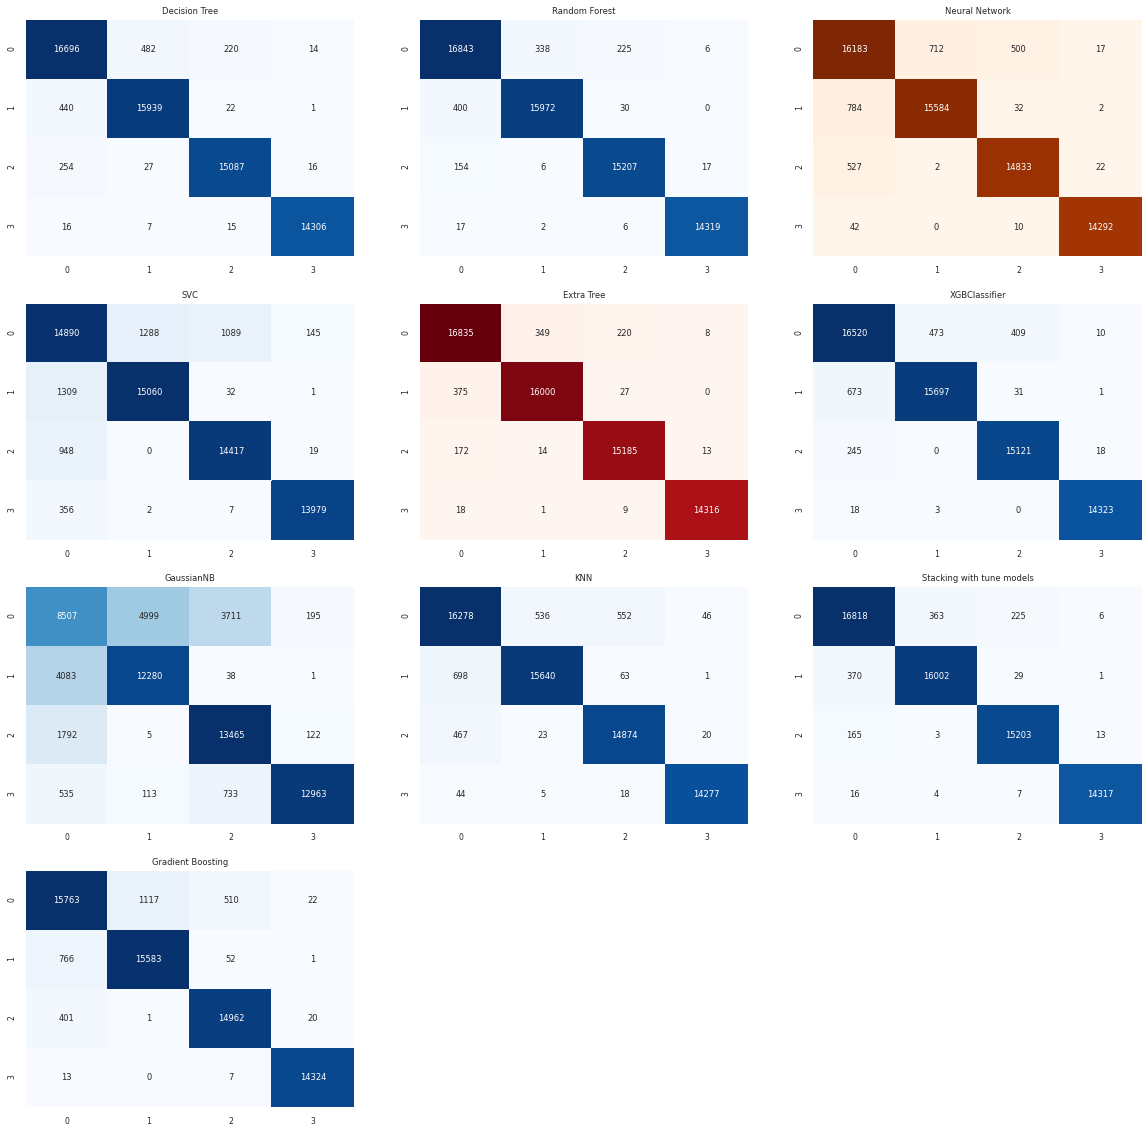

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.title("Decision Tree")
sns.heatmap(conf_DT,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(4,3,2)
plt.title("Random Forest")
sns.heatmap(conf_RF,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(4,3,3)
plt.title("Neural Network")
sns.heatmap(conf_MLP,annot=True,cmap="Oranges",fmt="d",cbar=False)

plt.subplot(4,3,4)
plt.title("SVC")
sns.heatmap(conf_SVM,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(4,3,5)
plt.title("Extra Tree")
sns.heatmap(conf_ET,annot=True,cmap="Reds",fmt="d",cbar=False)

# plt.subplot(4,4,6)
# plt.title("Logistic Regression")
# sns.heatmap(conf_LR,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(4,3,6)
plt.title("XGBClassifier")
sns.heatmap(conf_XGB,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(4,3,7)
plt.title("GaussianNB")
sns.heatmap(conf_GNB,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(4,3,8)
plt.title("KNN")
sns.heatmap(conf_KNN,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(4,3,9)
plt.title("Stacking with tune models")
sns.heatmap(conf_SC_tune_LR,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(4,3,10)
plt.title("Gradient Boosting")
sns.heatmap(conf_GB,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()

In [ ]:
models = [('Decision Tree', train_acc_DT, test_acc_DT, precision_score_DT, recall_score_DT, f1_score_DT, 'Good'),
          ('Random Forest', train_acc_RF, test_acc_RF, precision_score_RF, recall_score_RF, f1_score_RF, 'Good'),
          ('Neural Network', train_acc_MLP, test_acc_MLP, precision_score_MLP, recall_score_MLP, f1_score_MLP,'Good'),
          ('SVC', train_acc_SVM, test_acc_SVM, precision_score_SVM, recall_score_SVM, f1_score_SVM,'Good'),
          ('Extra Tree', train_acc_ET, test_acc_ET, precision_score_ET, recall_score_ET, f1_score_ET,'Good'),          
          ('XGBClassifier', train_acc_XGB, test_acc_XGB, precision_score_XGB, recall_score_XGB, f1_score_XGB,'Good'),
          ('GaussianNB', train_acc_GNB, test_acc_GNB, precision_score_GNB, recall_score_GNB, f1_score_GNB,'~'),
          ('KNN', train_acc_KNN, test_acc_KNN, precision_score_KNN, recall_score_KNN, f1_score_KNN,'Good'),
          
          ('Stacking with tune models - LR', train_acc_SC_tune_LR, test_acc_SC_tune_LR, precision_score_SC_tune_LR, recall_score_SC_tune_LR, f1_score_SC_tune_LR,'*** The Best ***'),
          
          ('Gradient Boosting', train_acc_GB, test_acc_GB, precision_score_GB, recall_score_GB, f1_score_GB,'Good'),
          
         ]

In [ ]:
predict_IR = pd.DataFrame(data = models, columns=['Model', 'Train_accuracy', 'Test_accuracy','precision_score', 'recall_score', 'f1_score', 'Description'])
predict_IR.style.background_gradient(cmap='YlGn')

,Model,Train_accuracy,Test_accuracy,precision_score,recall_score,f1_score,Description
0,Decision Tree,0.998793,0.976173,0.977235,0.977174,0.977203,Good
1,Random Forest,0.998793,0.981099,0.981882,0.981964,0.981920,Good
2,Neural Network,0.957778,0.958295,0.960231,0.960026,0.960123,Good
3,SVC,0.918450,0.918227,0.921896,0.921259,0.921557,Good
4,Extra Tree,0.998793,0.981020,0.981810,0.981866,0.981837,Good
5,XGBClassifier,0.970107,0.970398,0.971663,0.971807,0.971715,Good
6,GaussianNB,0.744834,0.743052,0.750620,0.754061,0.749845,~
7,KNN,0.973008,0.961081,0.962641,0.962648,0.962631,Good
8,Stacking with tune models - LR,0.998354,0.981083,0.981851,0.981963,0.981905,*** The Best ***
9,Gradient Boosting,0.954864,0.954204,0.955946,0.956634,0.956222,Good
